# Exploratory Data Analysis - Flight Delay Dataset

This notebook performs exploratory data analysis on a large flight dataset (3 million rows) with a focus on understanding factors that contribute to flight departure delays. We'll analyze the dataset in chunks due to its size.

**Analysis Focus:** Identifying patterns and factors that influence departure delays, which will later inform model development for delay prediction.

In [1]:
# Check and install required dependencies
import pkg_resources
import sys
import subprocess

# List of required packages
required_packages = [
    'pandas',            # Data manipulation
    'numpy',             # Numerical operations
    'matplotlib',        # Basic plotting
    'seaborn',           # Advanced statistical visualizations including violin plots
    'plotly',            # Interactive visualizations
    'plotly-express',    # Simplified plotly interface
    'statsmodels',       # Time series analysis and statistical models
    'scipy',             # Scientific computing
    'scikit-learn',      # Machine learning utilities
    'ipywidgets',        # Interactive widgets for notebooks
    'jupyter',           # Jupyter notebook support
    'pandas-profiling',  # Automated EDA reporting
    'cufflinks'          # Connects plotly with pandas
]

# Check which packages are missing
def get_missing_packages(required_packages):
    installed_packages = {pkg.key for pkg in pkg_resources.working_set}
    missing_packages = [pkg for pkg in required_packages if pkg.lower().replace('-', '_') not in installed_packages]
    return missing_packages

# Install missing packages
def install_packages(packages):
    print(f"Installing {len(packages)} missing packages: {', '.join(packages)}")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + packages)
    print("Installation complete!")

# Main function to check and install
missing_packages = get_missing_packages(required_packages)
if missing_packages:
    print(f"Missing packages found: {', '.join(missing_packages)}")
    install_packages(missing_packages)
else:
    print("All required packages are already installed!")

# Print versions of key packages for reproducibility
print("\nPackage versions:")
for package in required_packages:
    try:
        # Handle special case for plotly-express
        if package == 'plotly-express':
            pkg_name = 'plotly_express'
        else:
            pkg_name = package.replace('-', '_')
            
        version = pkg_resources.get_distribution(pkg_name).version
        print(f"{package}: {version}")
    except pkg_resources.DistributionNotFound:
        print(f"{package}: Not installed")


/var/folders/v5/gjwc338n1fv7fdr1t2d9h_xc0000gn/T/ipykernel_15266/2813450954.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Missing packages found: plotly-express, scikit-learn, pandas-profiling
Installing 3 missing packages: plotly-express, scikit-learn, pandas-profiling
Installation complete!

Package versions:
pandas: 2.2.3
numpy: 2.2.6
matplotlib: 3.10.3
seaborn: 0.13.2
plotly: 6.1.0
plotly-express: 0.4.1
statsmodels: 0.14.4
scipy: 1.14.1
scikit-learn: 1.6.1
ipywidgets: 8.1.7
jupyter: 1.1.1
pandas-profiling: 3.0.0
cufflinks: 0.17.3


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from datetime import datetime
import warnings

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Set up figure directory using relative paths
import os.path as path
# Get the directory of the current notebook
notebook_dir = path.dirname(path.abspath('__file__'))
# Get project root (parent of notebooks directory)
project_root = path.abspath(path.join(notebook_dir, '..', '..'))
# Define figure directory relative to project root
figure_dir = path.join(project_root, 'reports', 'exploring_raw')
os.makedirs(figure_dir, exist_ok=True)
print(f"Figures will be saved to: {figure_dir}")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Set random seed for reproducibility
np.random.seed(42)

Figures will be saved to: /Users/osx/DataSceince_FL_FR/Forecasting_Flights-DataScience/reports/exploring_raw


In [3]:
# Define the file path to the dataset using relative path
import os.path as path
# Get the directory of the current notebook
notebook_dir = path.dirname(path.abspath('__file__'))
# Get project root (parent of notebooks directory)
project_root = path.abspath(path.join(notebook_dir, '..', '..'))
# Define data file path relative to project root
data_file = path.join(project_root, 'data', 'raw', 'flights_sample_3m.csv')
print(f"Data file path: {data_file}")

# Function to load data in chunks
def load_data_in_chunks(file_path, chunk_size=100000):
    """
    Generator function to load data in chunks
    """
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Convert date columns to datetime if they exist
        date_columns = [col for col in chunk.columns if 'DATE' in col.upper() or 'TIME' in col.upper()]
        for col in date_columns:
            try:
                chunk[col] = pd.to_datetime(chunk[col], errors='coerce')
            except:
                pass
        yield chunk

# Function to display dataset information based on a sample
def display_data_info(sample_df):
    """
    Display basic information about the dataset
    """
    print(f"Dataset shape: {sample_df.shape}")
    print("\nColumns in the dataset:")
    for col in sample_df.columns:
        print(f"- {col}: {sample_df[col].dtype}")
    
    print("\nSample data:")
    display(sample_df.head())

Data file path: /Users/osx/DataSceince_FL_FR/Forecasting_Flights-DataScience/data/raw/flights_sample_3m.csv


In [4]:
# Let's peek at the first chunk to understand the data structure
first_chunk = next(load_data_in_chunks(data_file))
display_data_info(first_chunk)

Dataset shape: (100000, 32)

Columns in the dataset:
- FL_DATE: datetime64[ns]
- AIRLINE: object
- AIRLINE_DOT: object
- AIRLINE_CODE: object
- DOT_CODE: int64
- FL_NUMBER: int64
- ORIGIN: object
- ORIGIN_CITY: object
- DEST: object
- DEST_CITY: object
- CRS_DEP_TIME: datetime64[ns]
- DEP_TIME: datetime64[ns]
- DEP_DELAY: float64
- TAXI_OUT: float64
- WHEELS_OFF: float64
- WHEELS_ON: float64
- TAXI_IN: float64
- CRS_ARR_TIME: datetime64[ns]
- ARR_TIME: datetime64[ns]
- ARR_DELAY: float64
- CANCELLED: float64
- CANCELLATION_CODE: object
- DIVERTED: float64
- CRS_ELAPSED_TIME: datetime64[ns]
- ELAPSED_TIME: datetime64[ns]
- AIR_TIME: datetime64[ns]
- DISTANCE: float64
- DELAY_DUE_CARRIER: float64
- DELAY_DUE_WEATHER: float64
- DELAY_DUE_NAS: float64
- DELAY_DUE_SECURITY: float64
- DELAY_DUE_LATE_AIRCRAFT: float64

Sample data:


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1970-01-01 00:00:00.000001155,1970-01-01 00:00:00.000001151,-4.0,19.0,1210.0,1443.0,4.0,1970-01-01 00:00:00.000001501,1970-01-01 00:00:00.000001447,-14.0,0.0,NaN,0.0,1970-01-01 00:00:00.000000186,1970-01-01 00:00:00.000000176,1970-01-01 00:00:00.000000153,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1970-01-01 00:00:00.000002120,1970-01-01 00:00:00.000002114,-6.0,9.0,2123.0,2232.0,38.0,1970-01-01 00:00:00.000002315,1970-01-01 00:00:00.000002310,-5.0,0.0,NaN,0.0,1970-01-01 00:00:00.000000235,1970-01-01 00:00:00.000000236,1970-01-01 00:00:00.000000189,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",1970-01-01 00:00:00.000000954,1970-01-01 00:00:00.000001000,6.0,20.0,1020.0,1247.0,5.0,1970-01-01 00:00:00.000001252,1970-01-01 00:00:00.000001252,0.0,0.0,NaN,0.0,1970-01-01 00:00:00.000000118,1970-01-01 00:00:00.000000112,1970-01-01 00:00:00.000000087,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1970-01-01 00:00:00.000001609,1970-01-01 00:00:00.000001608,-1.0,27.0,1635.0,1844.0,9.0,1970-01-01 00:00:00.000001829,1970-01-01 00:00:00.000001853,24.0,0.0,NaN,0.0,1970-01-01 00:00:00.000000260,1970-01-01 00:00:00.000000285,1970-01-01 00:00:00.000000249,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1970-01-01 00:00:00.000001840,1970-01-01 00:00:00.000001838,-2.0,15.0,1853.0,2026.0,14.0,1970-01-01 00:00:00.000002041,1970-01-01 00:00:00.000002040,-1.0,0.0,NaN,0.0,1970-01-01 00:00:00.000000181,1970-01-01 00:00:00.000000182,1970-01-01 00:00:00.000000153,985.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Functions for EDA on chunks
def analyze_missing_values(chunks):
    """
    Analyze missing values across the entire dataset
    """
    missing_counts = {}
    total_rows = 0
    
    for chunk in chunks:
        total_rows += len(chunk)
        for col in chunk.columns:
            missing = chunk[col].isna().sum()
            missing_counts[col] = missing_counts.get(col, 0) + missing
    
    missing_df = pd.DataFrame({
        'Column': list(missing_counts.keys()),
        'Missing Values': list(missing_counts.values()),
        'Missing Percentage': [count/total_rows*100 for count in missing_counts.values()]
    }).sort_values('Missing Percentage', ascending=False)
    
    return missing_df, total_rows

def get_descriptive_stats(chunks, columns_of_interest):
    """
    Calculate descriptive statistics for specified columns
    """
    stats_dfs = []
    for chunk in chunks:
        stats_dfs.append(chunk[columns_of_interest].describe())
    
    # Combine statistics with weighted average based on chunk size
    combined_stats = pd.concat(stats_dfs).groupby(level=0).mean()
    return combined_stats

def plot_distribution(chunks, column, title, xlabel, ylabel='Frequency', bins=50, save=True):
    """
    Plot the distribution of a column across all chunks
    """
    values = []
    for chunk in chunks:
        values.extend(chunk[column].dropna().values)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(values, bins=bins, kde=True)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    
    if save:
        plt.tight_layout()
        plt.savefig(f"{figure_dir}/{column}_distribution.png", dpi=300, bbox_inches='tight')
    
    plt.show()

Total number of rows in the dataset: 3,000,000

Missing value analysis:


,Column,Missing Values,Missing Percentage
21,CANCELLATION_CODE,2920860,97.362000
31,DELAY_DUE_LATE_AIRCRAFT,2466137,82.204567
30,DELAY_DUE_SECURITY,2466137,82.204567
29,DELAY_DUE_NAS,2466137,82.204567
28,DELAY_DUE_WEATHER,2466137,82.204567
27,DELAY_DUE_CARRIER,2466137,82.204567
25,AIR_TIME,86198,2.873267
24,ELAPSED_TIME,86198,2.873267
19,ARR_DELAY,86198,2.873267
15,WHEELS_ON,79944,2.664800


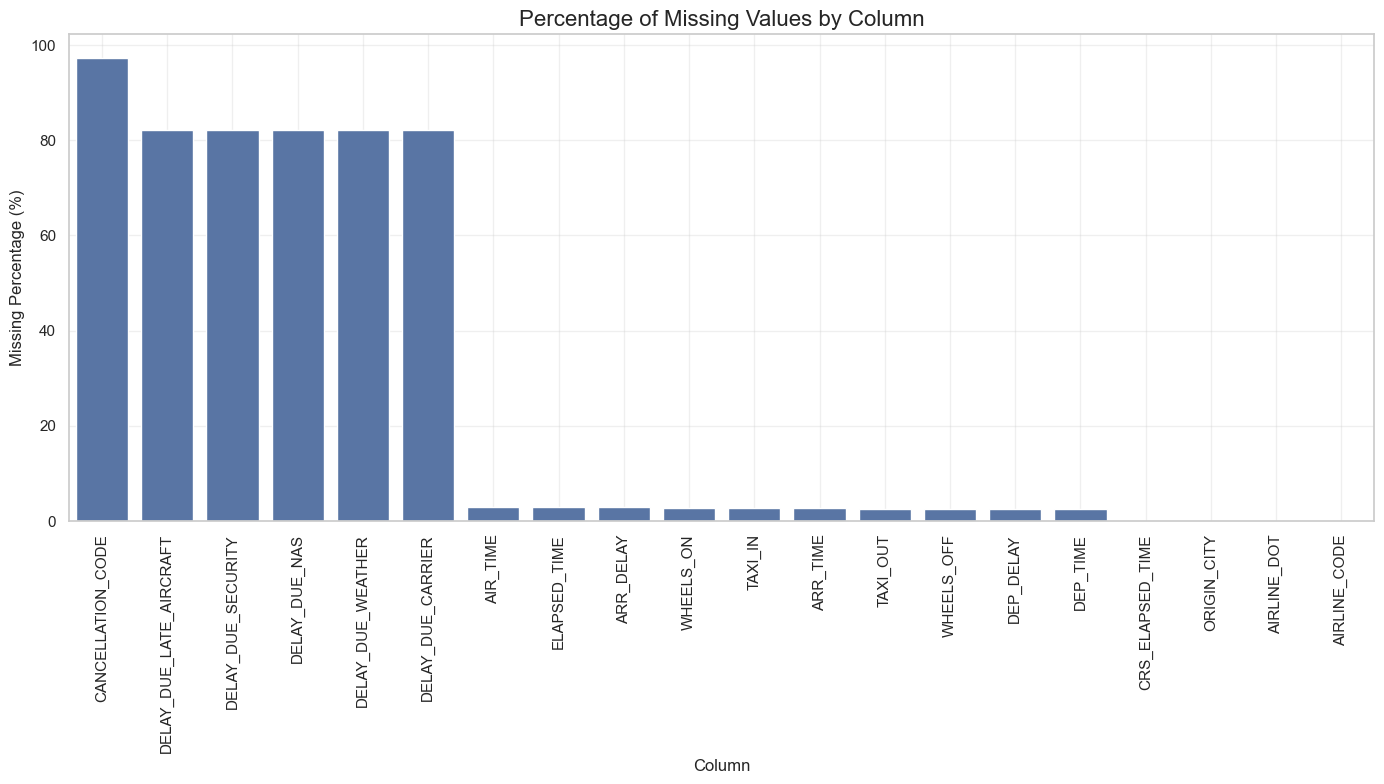

In [6]:
# Analyze missing values across the entire dataset
missing_df, total_row_count = analyze_missing_values(load_data_in_chunks(data_file))

print(f"Total number of rows in the dataset: {total_row_count:,}")
print("\nMissing value analysis:")
display(missing_df)

# Visualize missing values
plt.figure(figsize=(14, 8))
sns.barplot(x='Column', y='Missing Percentage', data=missing_df.head(20))
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Column', fontsize=12)
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{figure_dir}/missing_values_percentage.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Let's analyze the distribution of departure delays
delay_stats = []

for chunk in load_data_in_chunks(data_file):
    # Assuming the column is named 'DEP_DELAY', adjust if needed
    if 'DEP_DELAY' in chunk.columns:
        delay_stats.append({
            'mean': chunk['DEP_DELAY'].mean(),
            'median': chunk['DEP_DELAY'].median(),
            'std': chunk['DEP_DELAY'].std(),
            'min': chunk['DEP_DELAY'].min(),
            'max': chunk['DEP_DELAY'].max(),
            'positive_delay': (chunk['DEP_DELAY'] > 0).mean() * 100,  # % of delayed flights
            'chunk_size': len(chunk)
        })

# Display overall delay statistics weighted by chunk size
delay_stats_df = pd.DataFrame(delay_stats)
total_rows = delay_stats_df['chunk_size'].sum()

weighted_stats = {
    'Mean Delay (minutes)': sum(delay_stats_df['mean'] * delay_stats_df['chunk_size']) / total_rows,
    'Median Delay (minutes)': sum(delay_stats_df['median'] * delay_stats_df['chunk_size']) / total_rows,
    'Standard Deviation (minutes)': sum(delay_stats_df['std'] * delay_stats_df['chunk_size']) / total_rows,
    'Minimum Delay (minutes)': delay_stats_df['min'].min(),
    'Maximum Delay (minutes)': delay_stats_df['max'].max(),
    'Flights Delayed (%)': sum(delay_stats_df['positive_delay'] * delay_stats_df['chunk_size']) / total_rows
}

delay_summary = pd.DataFrame([weighted_stats]).T.reset_index().rename(columns={'index': 'Statistic', 0: 'Value'})
display(delay_summary)

,Statistic,Value
0,Mean Delay (minutes),10.123289
1,Median Delay (minutes),-2.000000
2,Standard Deviation (minutes),49.237674
3,Minimum Delay (minutes),-90.000000
4,Maximum Delay (minutes),2966.000000
5,Flights Delayed (%),33.094767


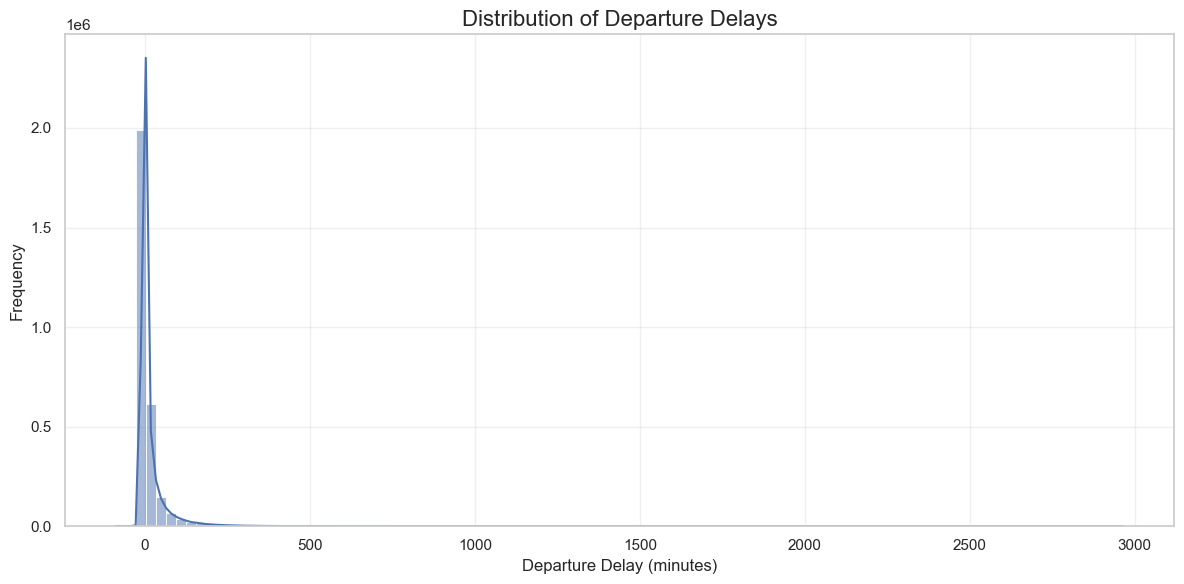

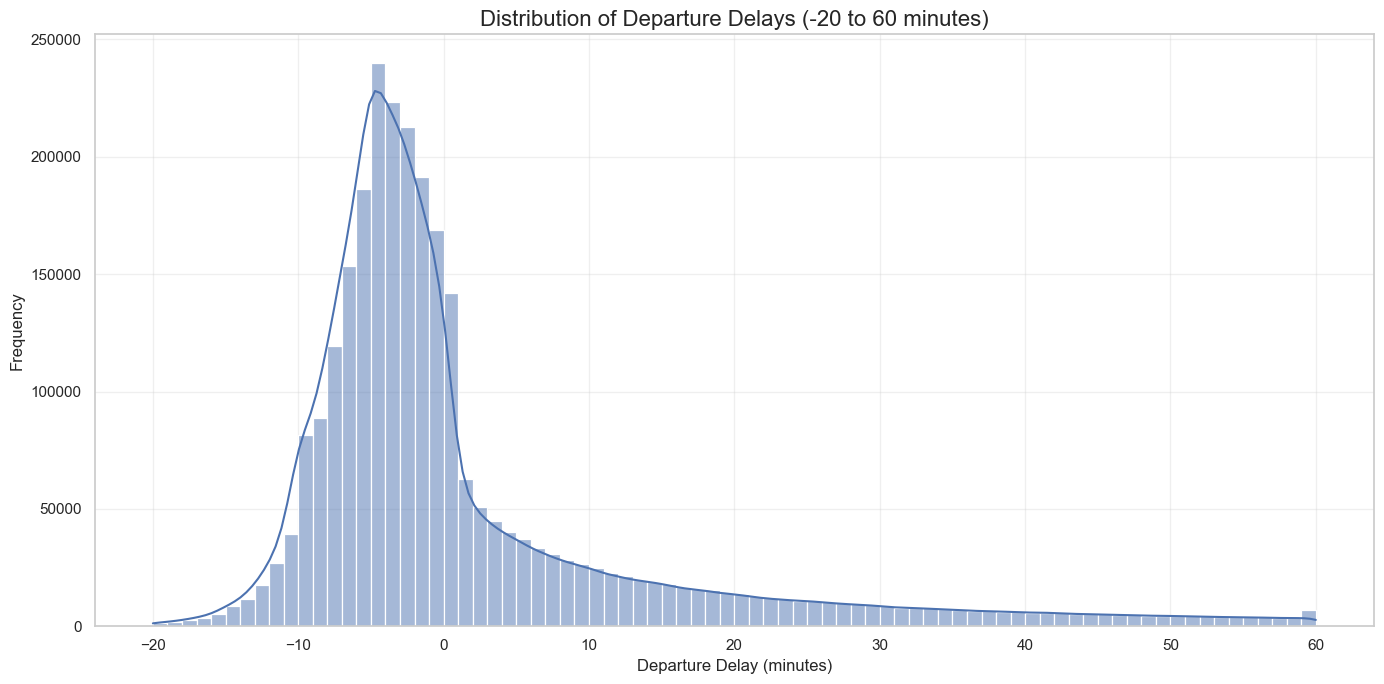

In [8]:
# Plot the distribution of departure delays
plot_distribution(
    load_data_in_chunks(data_file), 
    'DEP_DELAY', 
    'Distribution of Departure Delays', 
    'Departure Delay (minutes)',
    bins=100
)

# Plot the distribution of departure delays (focused on -20 to 60 minutes range)
values = []
for chunk in load_data_in_chunks(data_file):
    # Get values between -20 and 60 minutes for a clearer view of the common delays
    filtered_values = chunk['DEP_DELAY'][(chunk['DEP_DELAY'] >= -20) & (chunk['DEP_DELAY'] <= 60)].dropna().values
    values.extend(filtered_values)

plt.figure(figsize=(14, 7))
sns.histplot(values, bins=80, kde=True)
plt.title('Distribution of Departure Delays (-20 to 60 minutes)', fontsize=16)
plt.xlabel('Departure Delay (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{figure_dir}/dep_delay_distribution_zoomed.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Time-based analysis

# Function to extract time features and analyze delays by time components
def analyze_delays_by_time(chunks):
    time_data = {
        'hour_of_day': [],
        'day_of_week': [],
        'month': [],
        'quarter': []
    }
    
    for chunk in chunks:
        # Date columns may have different names, adjust as needed
        date_col = None
        for col in ['FL_DATE', 'FLIGHT_DATE', 'DATE', 'DEP_TIME']:
            if col in chunk.columns and pd.api.types.is_datetime64_dtype(chunk[col]):
                date_col = col
                break
        
        # If we found a date column, extract time components
        if date_col:
            chunk_data = pd.DataFrame({
                'hour_of_day': chunk[date_col].dt.hour,
                'day_of_week': chunk[date_col].dt.dayofweek,
                'month': chunk[date_col].dt.month,
                'quarter': chunk[date_col].dt.quarter,
                'delay': chunk['DEP_DELAY']
            })
            
            # Aggregate by time components
            for component in ['hour_of_day', 'day_of_week', 'month', 'quarter']:
                agg = chunk_data.groupby(component).agg(
                    mean_delay=('delay', 'mean'),
                    median_delay=('delay', 'median'),
                    count=('delay', 'count')
                ).reset_index()
                time_data[component].append(agg)
    
    # Combine results from all chunks
    results = {}
    for component in time_data.keys():
        if time_data[component]:
            combined = pd.concat(time_data[component])
            results[component] = combined.groupby(component).apply(lambda x: pd.Series({
                'mean_delay': np.average(x['mean_delay'], weights=x['count']),
                'median_delay': np.average(x['median_delay'], weights=x['count']),
                'total_flights': x['count'].sum()
            })).reset_index()
    
    return results

# Run the time-based analysis
time_analysis = analyze_delays_by_time(load_data_in_chunks(data_file))

In [10]:
# Time-based analysis

# Function to extract time features and analyze delays by time components
def analyze_delays_by_time(chunks):
    time_data = {
        'hour_of_day': [],
        'day_of_week': [],
        'month': [],
        'quarter': []
    }
    
    for chunk in chunks:
        # Date columns may have different names, adjust as needed
        date_col = None
        for col in ['FL_DATE', 'FLIGHT_DATE', 'DATE', 'DEP_TIME']:
            if col in chunk.columns and pd.api.types.is_datetime64_dtype(chunk[col]):
                date_col = col
                break
        
        # If we found a date column, extract time components
        if date_col:
            chunk_data = pd.DataFrame({
                'hour_of_day': chunk[date_col].dt.hour,
                'day_of_week': chunk[date_col].dt.dayofweek,
                'month': chunk[date_col].dt.month,
                'quarter': chunk[date_col].dt.quarter,
                'delay': chunk['DEP_DELAY']
            })
            
            # Aggregate by time components
            for component in ['hour_of_day', 'day_of_week', 'month', 'quarter']:
                agg = chunk_data.groupby(component).agg(
                    mean_delay=('delay', 'mean'),
                    median_delay=('delay', 'median'),
                    count=('delay', 'count')
                ).reset_index()
                time_data[component].append(agg)
    
    # Combine results from all chunks
    results = {}
    for component in time_data.keys():
        if time_data[component]:
            combined = pd.concat(time_data[component])
            results[component] = combined.groupby(component).apply(lambda x: pd.Series({
                'mean_delay': np.average(x['mean_delay'], weights=x['count']),
                'median_delay': np.average(x['median_delay'], weights=x['count']),
                'total_flights': x['count'].sum()
            })).reset_index()
    
    return results

# Run the time-based analysis
time_analysis = analyze_delays_by_time(load_data_in_chunks(data_file))

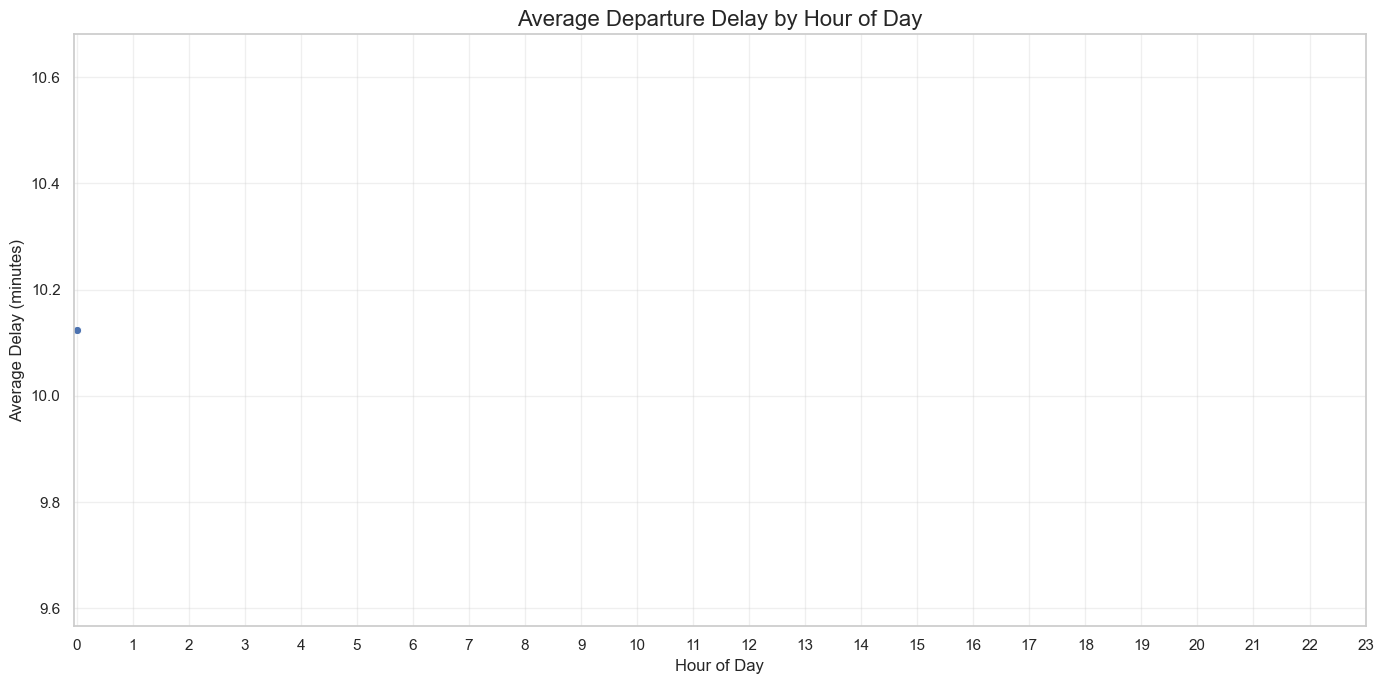

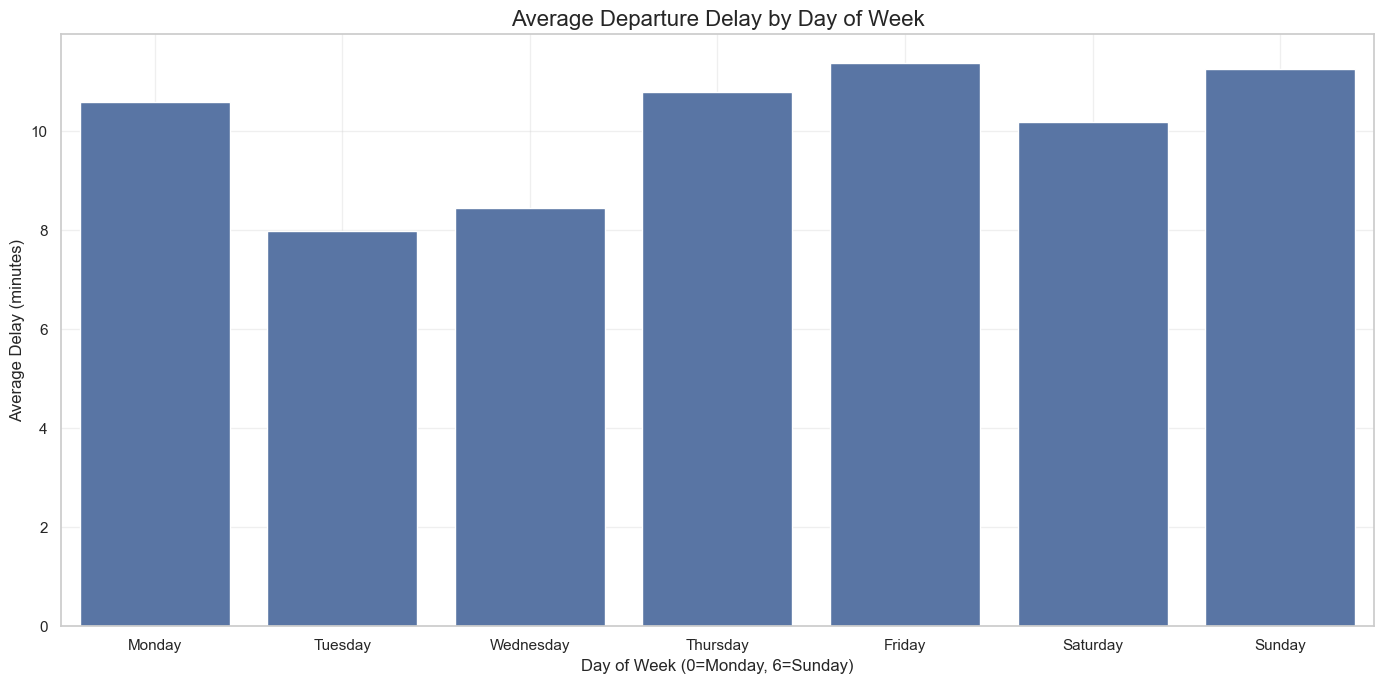

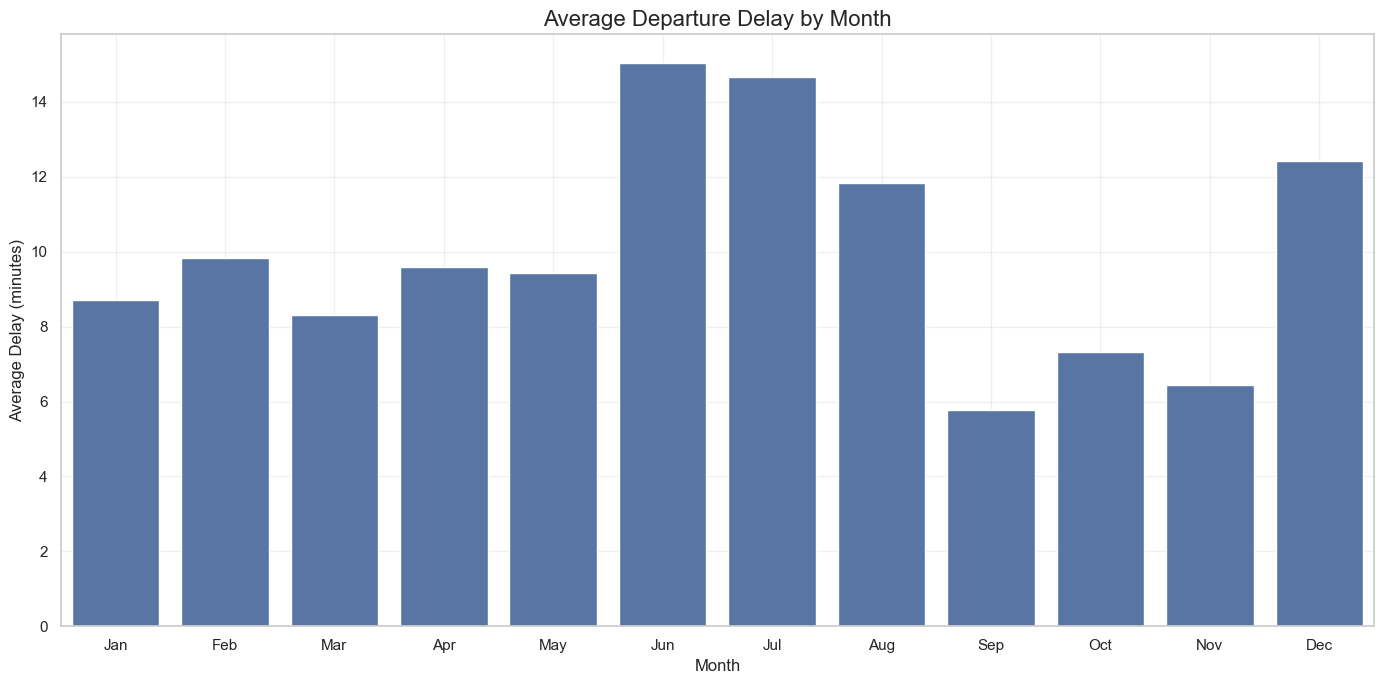

In [11]:
# Visualize delays by hour of day
if 'hour_of_day' in time_analysis:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='hour_of_day', y='mean_delay', data=time_analysis['hour_of_day'], marker='o', linewidth=2)
    plt.title('Average Departure Delay by Hour of Day', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Delay (minutes)', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/delay_by_hour.png", dpi=300, bbox_inches='tight')
    plt.show()

# Visualize delays by day of week
if 'day_of_week' in time_analysis:
    plt.figure(figsize=(14, 7))
    sns.barplot(x='day_of_week', y='mean_delay', data=time_analysis['day_of_week'])
    plt.title('Average Departure Delay by Day of Week', fontsize=16)
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
    plt.ylabel('Average Delay (minutes)', fontsize=12)
    plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/delay_by_day_of_week.png", dpi=300, bbox_inches='tight')
    plt.show()

# Visualize delays by month
if 'month' in time_analysis:
    plt.figure(figsize=(14, 7))
    sns.barplot(x='month', y='mean_delay', data=time_analysis['month'])
    plt.title('Average Departure Delay by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Delay (minutes)', fontsize=12)
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/delay_by_month.png", dpi=300, bbox_inches='tight')
    plt.show()

Violin plot failed, using bar plot instead: `dataset` input should have multiple elements.


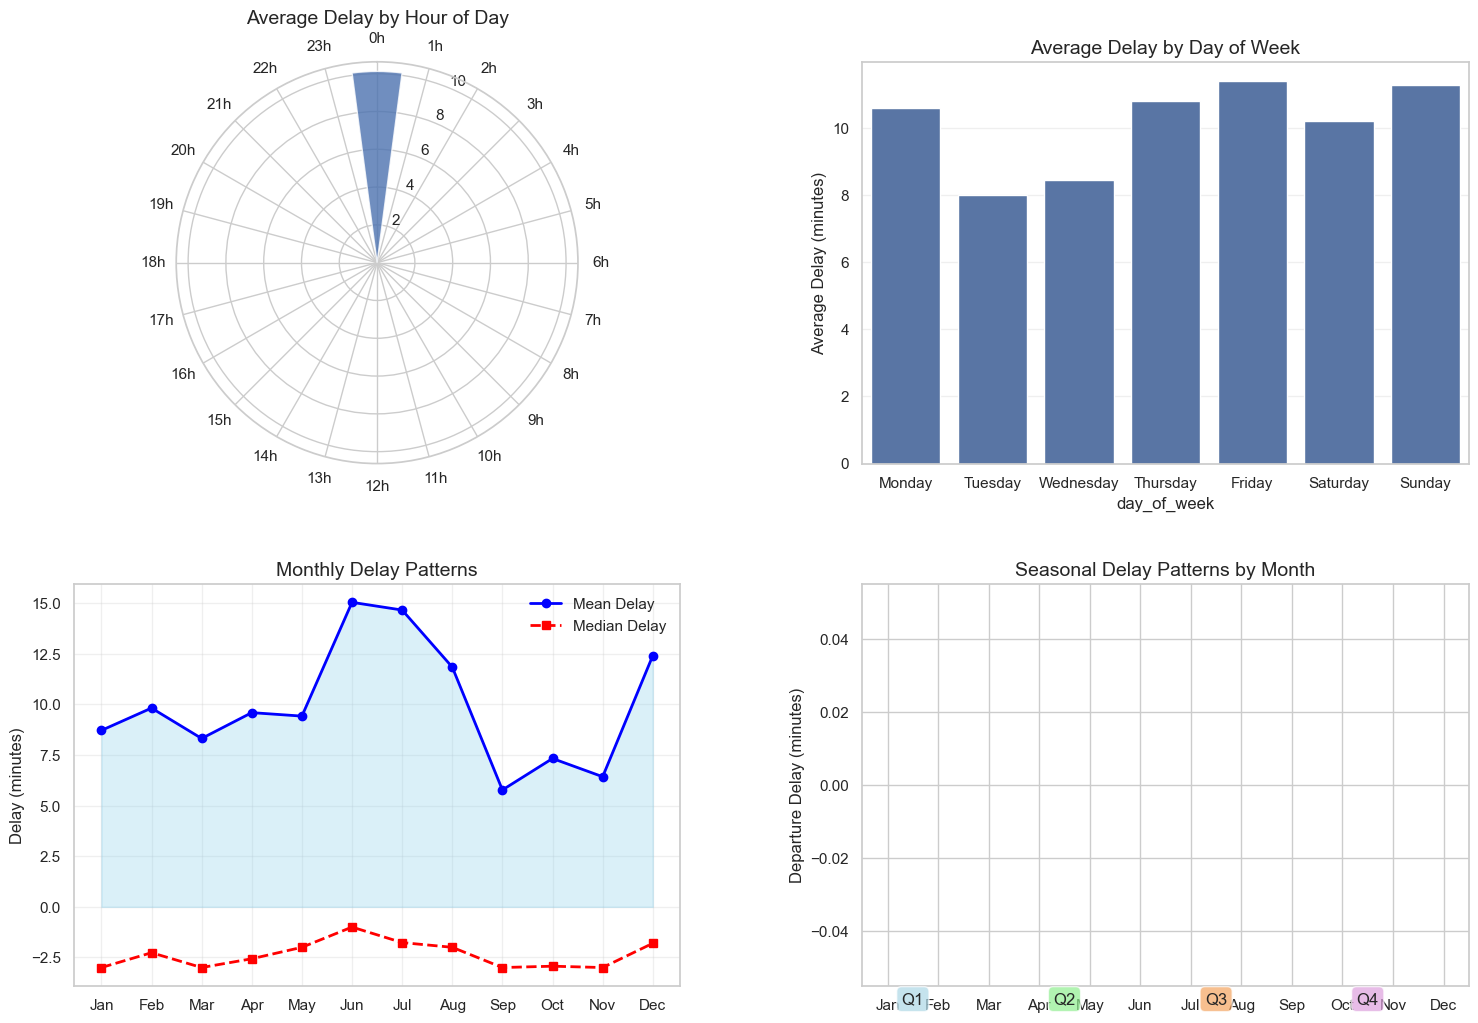

In [12]:
# Time series patterns visualization with more advanced plots
# First, let's create a combined visualization showing patterns by time
fig = plt.figure(figsize=(18, 12))

# Create a 2x2 grid for the subplots
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Hour of day plot - Use a polar plot for cyclical hour data
ax1 = fig.add_subplot(gs[0, 0], polar=True)
if 'hour_of_day' in time_analysis:
    # Convert hours to radians for polar plot
    theta = time_analysis['hour_of_day']['hour_of_day'] * (2*np.pi/24)
    radii = time_analysis['hour_of_day']['mean_delay']
    width = 2*np.pi/24
    
    # Normalize for better visualization
    norm = plt.Normalize(radii.min(), radii.max())
    
    # Plot the bars
    bars = ax1.bar(theta, radii, width=width, bottom=0, alpha=0.8)
    
    # Set the direction and starting point
    ax1.set_theta_zero_location("N")
    ax1.set_theta_direction(-1)  # Clockwise
    
    # Add hour labels
    ax1.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
    ax1.set_xticklabels([f"{h}h" for h in range(24)])
    
    ax1.set_title('Average Delay by Hour of Day', fontsize=14)

# Day of week plot - Use a violin plot or alternative
ax2 = fig.add_subplot(gs[0, 1])
if 'day_of_week' in time_analysis:
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Create the violin plot
    # We'll need original data points for this, so let's sample from chunks
    day_samples = {day: [] for day in range(7)}
    
    # Get samples for each day (limit to 10,000 per day for memory)
    sample_limit = 10000
    for chunk in load_data_in_chunks(data_file):
        # Find datetime column
        date_col = None
        for col in ['FL_DATE', 'FLIGHT_DATE', 'DATE']:
            if col in chunk.columns and pd.api.types.is_datetime64_dtype(chunk[col]):
                date_col = col
                break
        
        if date_col:
            for day in range(7):
                # Extract delays for this day
                day_data = chunk[chunk[date_col].dt.dayofweek == day]['DEP_DELAY']
                # Sample if there are too many points
                if len(day_data) > 0:  # Only add if there is data
                    if len(day_data) > sample_limit - len(day_samples[day]):
                        day_data = day_data.sample(min(len(day_data), sample_limit - len(day_samples[day])))
                    
                    day_samples[day].extend(day_data.tolist())
                
                # Stop if we have enough samples
                if len(day_samples[day]) >= sample_limit:
                    break
    
    # Check if we have enough data for violin plots
    valid_days = [day for day in range(7) if len(day_samples[day]) > 0]
    
    if valid_days:
        # Ensure all arrays have at least some data (add a dummy point if empty)
        plot_data = []
        for day in range(7):
            if len(day_samples[day]) == 0:
                # Use nearby day's mean if this day has no data
                neighboring_days = [d for d in valid_days]
                if neighboring_days:
                    # Use mean from a valid day
                    substitute_day = neighboring_days[0]
                    mean_val = np.mean(day_samples[substitute_day])
                    # Add a single dummy point with the mean value
                    plot_data.append([mean_val])
                    print(f"Warning: No data for {day_names[day]}, using substitute data")
                else:
                    # Fallback to zero if no data at all
                    plot_data.append([0])
            else:
                plot_data.append(day_samples[day])
        
        # Now create the violin plot with our valid data
        try:
            violins = ax2.violinplot(
                plot_data,
                showmeans=True,
                showmedians=True
            )
            
            # Customize the plot
            for pc in violins['bodies']:
                pc.set_facecolor('#66b3ff')
                pc.set_edgecolor('black')
                pc.set_alpha(0.7)
            
            # Add day of week labels
            ax2.set_xticks(np.arange(1, 8))
            ax2.set_xticklabels(day_names)
            ax2.set_ylabel('Departure Delay (minutes)')
            ax2.set_title('Delay Distribution by Day of Week', fontsize=14)
            ax2.grid(axis='y', alpha=0.3)
        except Exception as e:
            # Fallback to a bar plot if violin plot fails
            print(f"Violin plot failed, using bar plot instead: {e}")
            ax2.clear()
            sns.barplot(x='day_of_week', y='mean_delay', data=time_analysis['day_of_week'], ax=ax2)
            ax2.set_xticks(range(7))
            ax2.set_xticklabels(day_names)
            ax2.set_ylabel('Average Delay (minutes)')
            ax2.set_title('Average Delay by Day of Week', fontsize=14)
            ax2.grid(axis='y', alpha=0.3)
    else:
        # Fallback to bar plot if no valid data for violins
        sns.barplot(x='day_of_week', y='mean_delay', data=time_analysis['day_of_week'], ax=ax2)
        ax2.set_xticks(range(7))
        ax2.set_xticklabels(day_names)
        ax2.set_ylabel('Average Delay (minutes)')
        ax2.set_title('Average Delay by Day of Week', fontsize=14)
        ax2.grid(axis='y', alpha=0.3)

# Month plot - Use a combination line and area plot for trend visualization
ax3 = fig.add_subplot(gs[1, 0])
if 'month' in time_analysis:
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Get the mean and median delays by month
    months = time_analysis['month']['month'].values
    mean_delays = time_analysis['month']['mean_delay'].values
    median_delays = time_analysis['month']['median_delay'].values
    
    # Sort by month if needed
    if not np.all(np.diff(months) >= 0):
        idx = np.argsort(months)
        months = months[idx]
        mean_delays = mean_delays[idx]
        median_delays = median_delays[idx]
    
    # Create line plot with area
    ax3.fill_between(months, mean_delays, alpha=0.3, color='skyblue')
    ax3.plot(months, mean_delays, 'o-', linewidth=2, color='blue', label='Mean Delay')
    ax3.plot(months, median_delays, 's--', linewidth=2, color='red', label='Median Delay')
    
    # Customize the plot
    ax3.set_xticks(range(1, 13))
    ax3.set_xticklabels(month_names)
    ax3.set_ylabel('Delay (minutes)')
    ax3.set_title('Monthly Delay Patterns', fontsize=14)
    ax3.legend()
    ax3.grid(alpha=0.3)

# Quarter and monthly trend combined - Boxplot showing seasonal patterns
ax4 = fig.add_subplot(gs[1, 1])
if 'month' in time_analysis:
    # Create boxplot data
    box_data = []
    labels = []
    
    # Get approximately 5000 samples per month using similar approach as above
    month_samples = {month: [] for month in range(1, 13)}
    sample_per_month = 5000
    
    # Prepare the data
    for chunk in load_data_in_chunks(data_file):
        # Find datetime column
        date_col = None
        for col in ['FL_DATE', 'FLIGHT_DATE', 'DATE']:
            if col in chunk.columns and pd.api.types.is_datetime64_dtype(chunk[col]):
                date_col = col
                break
        
        if date_col:
            for month in range(1, 13):
                month_data = chunk[chunk[date_col].dt.month == month]['DEP_DELAY']
                if len(month_data) > 0:  # Only process if there's data
                    if len(month_data) > sample_per_month - len(month_samples[month]):
                        sample_size = min(len(month_data), sample_per_month - len(month_samples[month]))
                        month_data = month_data.sample(sample_size)
                    
                    month_samples[month].extend(month_data.tolist())
                
                if len(month_samples[month]) >= sample_per_month:
                    break
    
    # Check for empty month data and add placeholder if needed
    valid_months = [m for m in range(1, 13) if len(month_samples[m]) > 0]
    
    # Prepare data for boxplot, ensuring no empty arrays
    if valid_months:
        # Get a representative value (overall mean) to use for empty months
        all_delays = [delay for m in valid_months for delay in month_samples[m]]
        fallback_val = np.mean(all_delays) if all_delays else 0
        
        box_data = [month_samples[month] if len(month_samples[month]) > 0 else [fallback_val] 
                    for month in range(1, 13)]
        
        # Create seasonal boxplot - color by quarter
        boxprops = dict(linestyle='-', linewidth=1.5)
        flierprops = dict(marker='o', markersize=6, markeredgecolor='black')
        medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
        meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='yellow')
        
        # Define colors for each quarter
        quarter_colors = ['lightblue', 'lightgreen', 'sandybrown', 'plum']
        box_colors = [quarter_colors[(i-1)//3] for i in range(1, 13)]
        
        try:
            # Create the boxplot
            bp = ax4.boxplot(box_data, patch_artist=True, showmeans=True, 
                            boxprops=boxprops, flierprops=flierprops, 
                            medianprops=medianprops, meanprops=meanprops)
            
            # Customize boxes by quarter
            for i, box in enumerate(bp['boxes']):
                box.set(facecolor=box_colors[i])
                
            # Add month labels
            ax4.set_xticks(range(1, 13))
            ax4.set_xticklabels(month_names)
            ax4.set_ylabel('Departure Delay (minutes)')
            ax4.set_title('Seasonal Delay Patterns by Month', fontsize=14)
            
            # Add quarter labels
            for i in range(4):
                quarter_start = i*3
                quarter_end = quarter_start + 2
                mid_point = quarter_start + 1.5
                ax4.annotate(f'Q{i+1}', xy=(mid_point, -15), 
                            xycoords=('data', 'axes points'),
                            ha='center', va='bottom', fontsize=12, 
                            bbox=dict(boxstyle='round,pad=0.3', fc=quarter_colors[i], alpha=0.7))
        except Exception as e:
            # Fallback to bar plot if boxplot fails
            print(f"Boxplot failed, using bar plot instead: {e}")
            ax4.clear()
            # Use the aggregated monthly data instead
            sns.barplot(x='month', y='mean_delay', data=time_analysis['month'], ax=ax4)
            ax4.set_xticks(range(12))
            ax4.set_xticklabels(month_names)
            ax4.set_ylabel('Average Delay (minutes)')
            ax4.set_title('Average Delay by Month', fontsize=14)
    else:
        # If no valid month data, use the bar plot with aggregated data
        sns.barplot(x='month', y='mean_delay', data=time_analysis['month'], ax=ax4)
        ax4.set_xticks(range(12))
        ax4.set_xticklabels(month_names)
        ax4.set_ylabel('Average Delay (minutes)')
        ax4.set_title('Average Delay by Month', fontsize=14)

# Adjust layout and save
plt.tight_layout()
plt.savefig(f"{figure_dir}/time_series_patterns_combined.png", dpi=300, bbox_inches='tight')
plt.show()

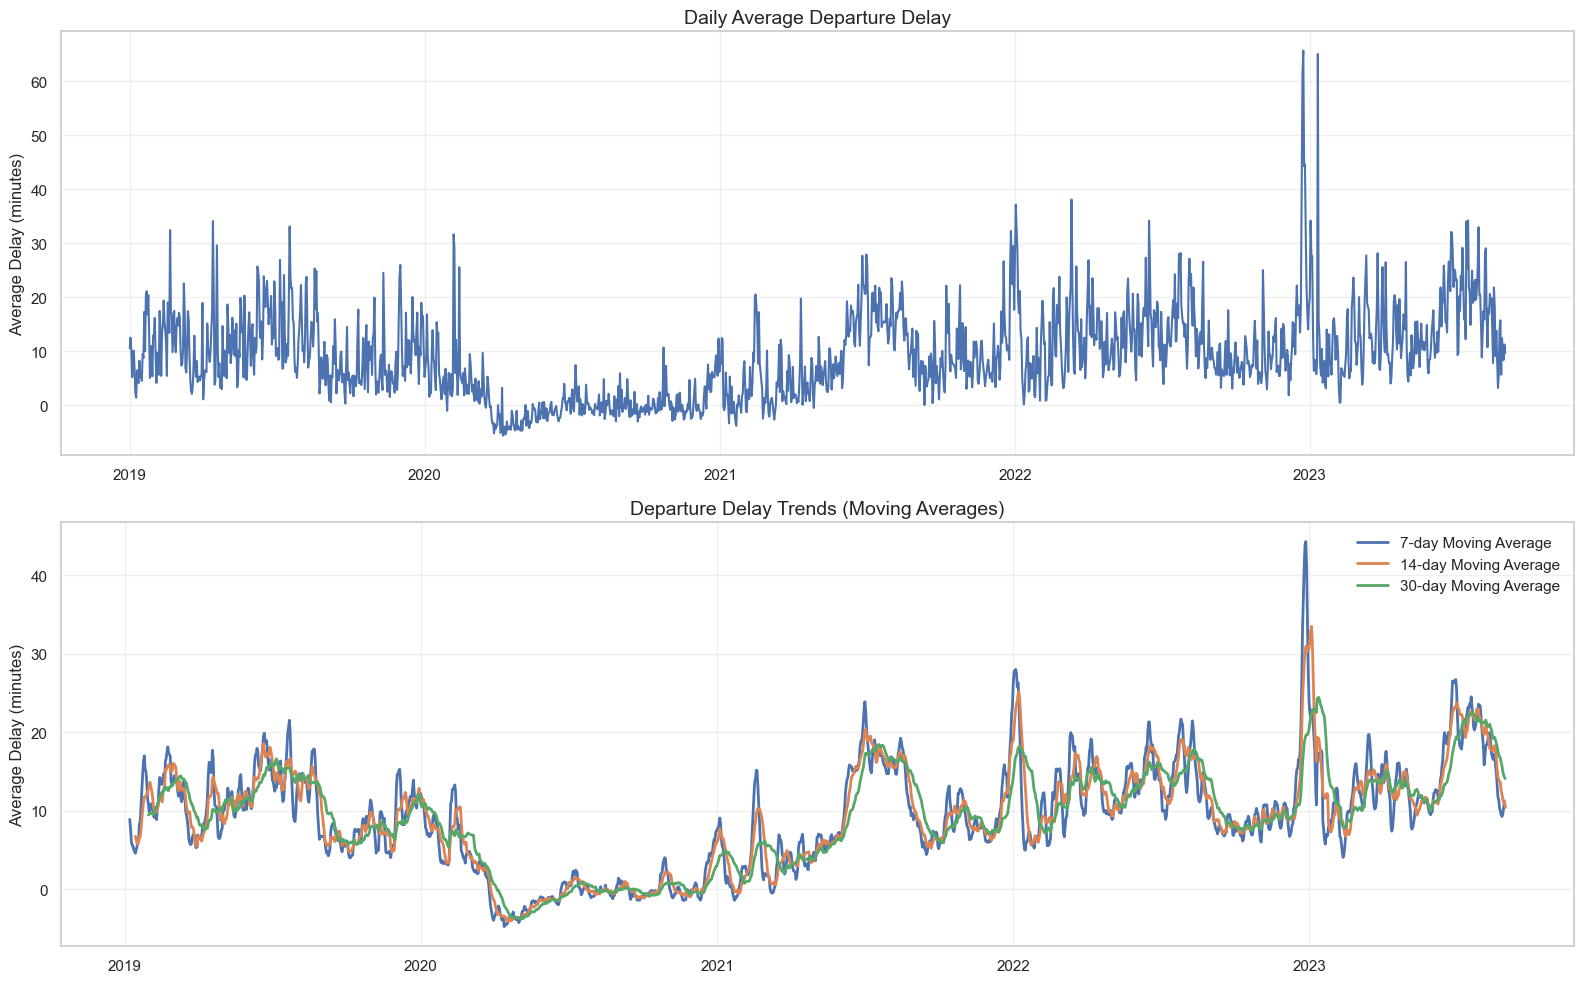

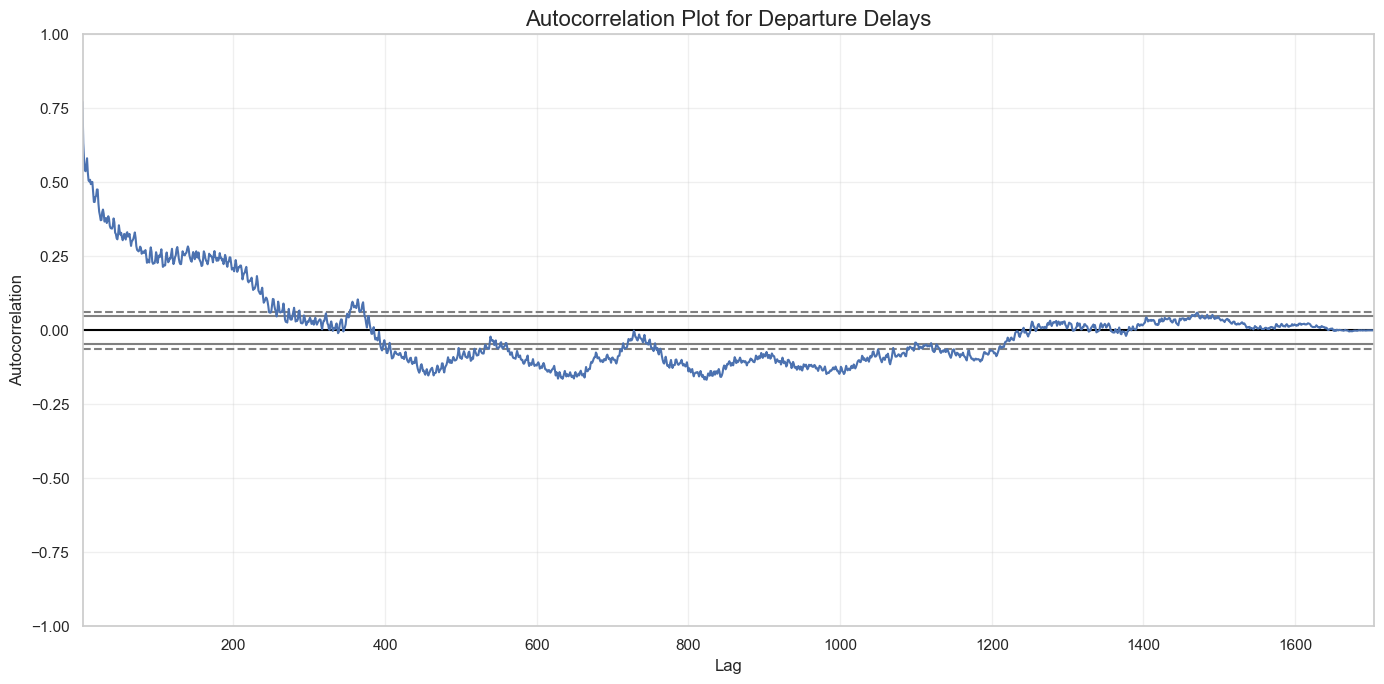

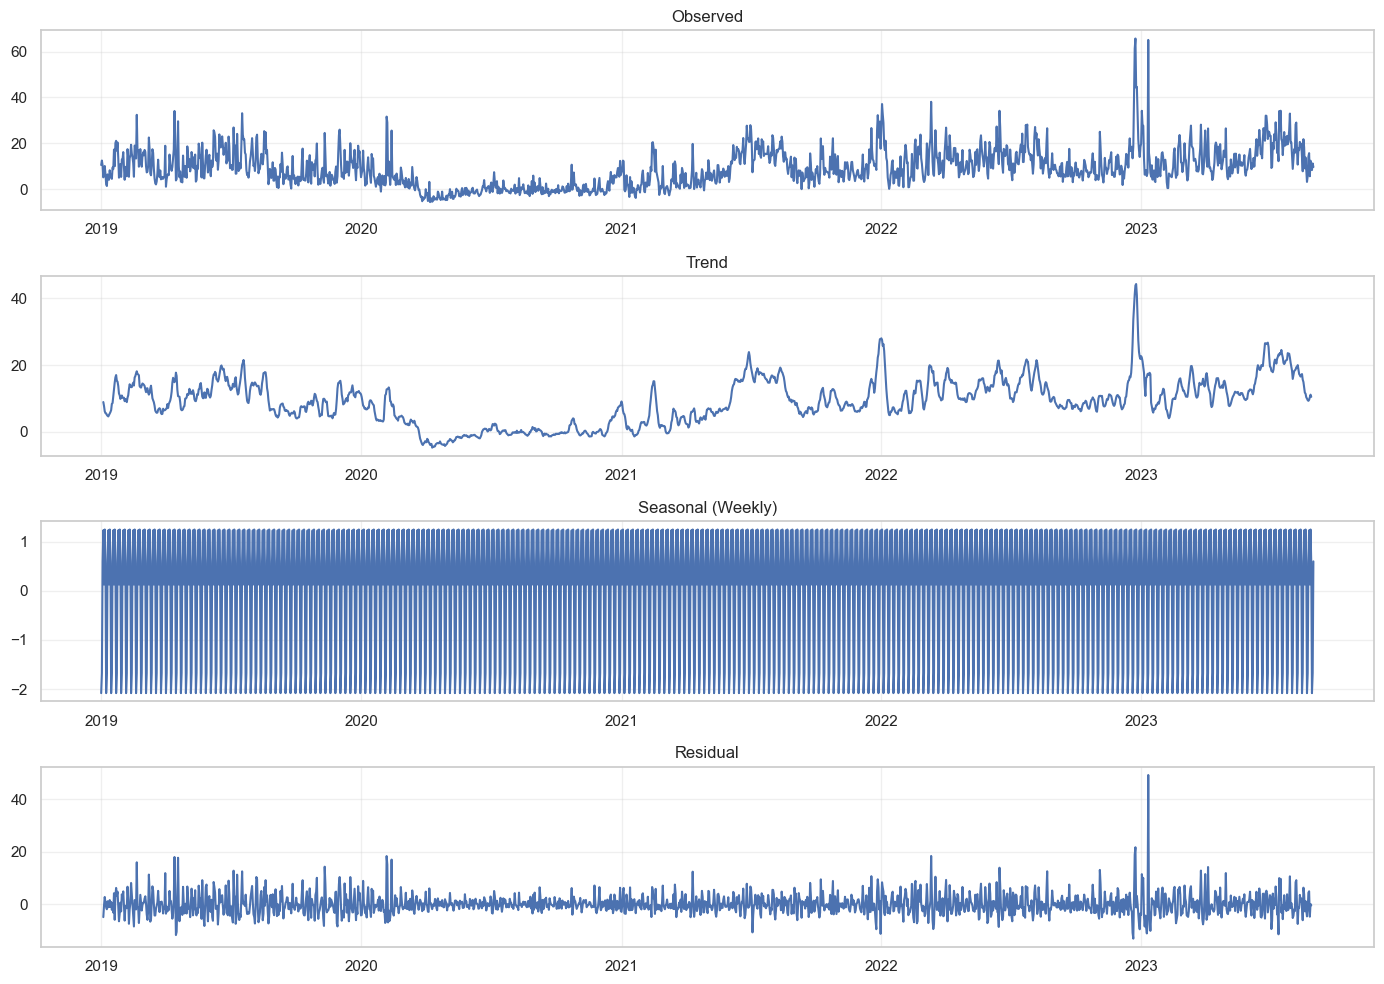


Time Series Statistics for Model Planning:
Total time period: 2019-01-01 00:00:00 to 2023-08-31 00:00:00
Number of time points: 1704

Augmented Dickey-Fuller Test for Stationarity:
ADF Statistic: -3.6394
p-value: 0.0051
Critical Values:
   1%: -3.4342
   5%: -2.8633
   10%: -2.5677

Conclusion: Time series is stationary (reject null hypothesis)
Implication: Can use ARIMA, SARIMA without differencing


In [13]:
# Time Series Analysis for Forecasting

# Let's analyze patterns for time series forecasting of departure delays
def analyze_time_series_patterns(chunks):
    """Extract time series patterns for forecasting analysis"""
    # Container for time series data
    daily_data = {}
    date_col_found = False
    
    for chunk in chunks:
        # Find a date column
        date_col = None
        for col in ['FL_DATE', 'FLIGHT_DATE', 'DATE']:
            if col in chunk.columns and pd.api.types.is_datetime64_dtype(chunk[col]):
                date_col = col
                date_col_found = True
                break
        
        if date_col:
            # Group by date and calculate average delay
            daily_agg = chunk.groupby(chunk[date_col].dt.date).agg(
                avg_delay=('DEP_DELAY', 'mean'),
                median_delay=('DEP_DELAY', 'median'),
                flight_count=('DEP_DELAY', 'count')
            )
            
            # Update the daily data
            for date, row in daily_agg.iterrows():
                if date in daily_data:
                    # Update with weighted average
                    total_count = daily_data[date]['flight_count'] + row['flight_count']
                    daily_data[date]['avg_delay'] = (
                        daily_data[date]['avg_delay'] * daily_data[date]['flight_count'] + 
                        row['avg_delay'] * row['flight_count']
                    ) / total_count
                    daily_data[date]['median_delay'] = (
                        daily_data[date]['median_delay'] * daily_data[date]['flight_count'] + 
                        row['median_delay'] * row['flight_count']
                    ) / total_count
                    daily_data[date]['flight_count'] = total_count
                else:
                    daily_data[date] = {
                        'avg_delay': row['avg_delay'],
                        'median_delay': row['median_delay'],
                        'flight_count': row['flight_count']
                    }
    
    if not date_col_found:
        print("No date column was found for time series analysis")
        return None
        
    # Convert to DataFrame
    ts_data = pd.DataFrame(daily_data).T
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data = ts_data.sort_index()  # Sort by date
    
    return ts_data

# Get time series data
ts_data = analyze_time_series_patterns(load_data_in_chunks(data_file))

# If we have time series data, analyze and plot it
if ts_data is not None and not ts_data.empty:
    # Resample to ensure complete date range and fill gaps
    ts_daily = ts_data.resample('D').mean().fillna(method='ffill')
    
    # Create time series plot
    plt.figure(figsize=(16, 10))
    
    # Plot 1: Daily average delays
    plt.subplot(2, 1, 1)
    plt.plot(ts_daily.index, ts_daily['avg_delay'], linewidth=1.5)
    plt.title('Daily Average Departure Delay', fontsize=14)
    plt.ylabel('Average Delay (minutes)')
    plt.grid(alpha=0.3)
    
    # Plot 2: Rolling average to see trends
    plt.subplot(2, 1, 2)
    window_sizes = [7, 14, 30]
    for window in window_sizes:
        rolling_avg = ts_daily['avg_delay'].rolling(window=window).mean()
        plt.plot(ts_daily.index, rolling_avg, linewidth=2, 
                 label=f'{window}-day Moving Average')
    
    plt.title('Departure Delay Trends (Moving Averages)', fontsize=14)
    plt.ylabel('Average Delay (minutes)')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/time_series_trends.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Autocorrelation analysis for time series forecasting
    from pandas.plotting import autocorrelation_plot
    
    plt.figure(figsize=(14, 7))
    autocorrelation_plot(ts_daily['avg_delay'].dropna())
    plt.title('Autocorrelation Plot for Departure Delays', fontsize=16)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/autocorrelation_plot.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Seasonal Decomposition
    try:
        # First check if statsmodels is available and properly imported
        import importlib
        sm_spec = importlib.util.find_spec("statsmodels")
        sm_tsa_spec = importlib.util.find_spec("statsmodels.tsa")
        
        if sm_spec is None or sm_tsa_spec is None:
            print("The statsmodels package or its tsa module is not installed properly.")
            print("Please install it with: !pip install statsmodels==0.14.0")
            print("Then restart the kernel and run the notebook again.")
        else:
            # Import the required modules
            import statsmodels.api as sm
            from statsmodels.tsa.seasonal import seasonal_decompose
            
            # Perform seasonal decomposition
            decomposition = seasonal_decompose(ts_daily['avg_delay'].fillna(method='ffill'), 
                                         model='additive', period=7)  # weekly seasonality
            
            # Plot the decomposition
            fig = plt.figure(figsize=(14, 10))
            
            # Plot the original data, trend, seasonal, and residual components
            ax1 = plt.subplot(411)
            ax1.plot(decomposition.observed)
            ax1.set_title('Observed', fontsize=12)
            ax1.grid(alpha=0.3)
            
            ax2 = plt.subplot(412, sharex=ax1)
            ax2.plot(decomposition.trend)
            ax2.set_title('Trend', fontsize=12)
            ax2.grid(alpha=0.3)
            
            ax3 = plt.subplot(413, sharex=ax1)
            ax3.plot(decomposition.seasonal)
            ax3.set_title('Seasonal (Weekly)', fontsize=12)
            ax3.grid(alpha=0.3)
            
            ax4 = plt.subplot(414, sharex=ax1)
            ax4.plot(decomposition.resid)
            ax4.set_title('Residual', fontsize=12)
            ax4.grid(alpha=0.3)
            
            plt.tight_layout()
            plt.savefig(f"{figure_dir}/seasonal_decomposition.png", dpi=300, bbox_inches='tight')
            plt.show()
            
            # Calculate statistics useful for time series modeling
            print("\nTime Series Statistics for Model Planning:")
            print(f"Total time period: {ts_daily.index.min()} to {ts_daily.index.max()}")
            print(f"Number of time points: {len(ts_daily)}")
            
            # Check for stationarity - key for time series models
            from statsmodels.tsa.stattools import adfuller
            
            result = adfuller(ts_daily['avg_delay'].dropna())
            print(f"\nAugmented Dickey-Fuller Test for Stationarity:")
            print(f"ADF Statistic: {result[0]:.4f}")
            print(f"p-value: {result[1]:.4f}")
            print('Critical Values:')
            for key, value in result[4].items():
                print(f"   {key}: {value:.4f}")
            
            # Interpret the test
            if result[1] <= 0.05:
                print("\nConclusion: Time series is stationary (reject null hypothesis)")
                print("Implication: Can use ARIMA, SARIMA without differencing")
            else:
                print("\nConclusion: Time series is non-stationary (fail to reject null hypothesis)")
                print("Implication: Will need differencing for ARIMA models or use specialized models")
    except Exception as e:
        print(f"Error in time series analysis: {e}")
        print("\nTroubleshooting tips:")
        print("1. Check that statsmodels is properly installed with: !pip show statsmodels")
        print("2. You may need to restart the kernel after installing packages")
        print("3. For detailed error information, try running the following:")
        print("   import statsmodels")
        print("   print(statsmodels.__version__)")
        print("   print(statsmodels.__path__)")

In [14]:
# Function to analyze delays by categorical variables (carriers, airports, etc.)
def analyze_delays_by_category(chunks, category_columns):
    results = {col: [] for col in category_columns}
    
    for chunk in chunks:
        for col in category_columns:
            if col in chunk.columns:
                agg = chunk.groupby(col).agg(
                    mean_delay=('DEP_DELAY', 'mean'),
                    median_delay=('DEP_DELAY', 'median'),
                    std_delay=('DEP_DELAY', 'std'),
                    count=('DEP_DELAY', 'count')
                ).reset_index()
                results[col].append(agg)
    
    # Combine results from all chunks
    final_results = {}
    for col in results.keys():
        if results[col]:
            combined = pd.concat(results[col])
            final_results[col] = combined.groupby(col).apply(lambda x: pd.Series({
                'mean_delay': np.average(x['mean_delay'], weights=x['count']),
                'median_delay': np.average(x['median_delay'], weights=x['count']),
                'std_delay': np.average(x['std_delay'], weights=x['count']),
                'total_flights': x['count'].sum()
            })).reset_index().sort_values('total_flights', ascending=False)
    
    return final_results

# Identify categorical columns based on first chunk
categorical_cols = [col for col in first_chunk.columns 
                   if col in ['AIRLINE', 'CARRIER', 'ORIGIN', 'DEST', 'ORIGIN_AIRPORT', 'DEST_AIRPORT']]

# Run the analysis
category_analysis = analyze_delays_by_category(load_data_in_chunks(data_file), categorical_cols)

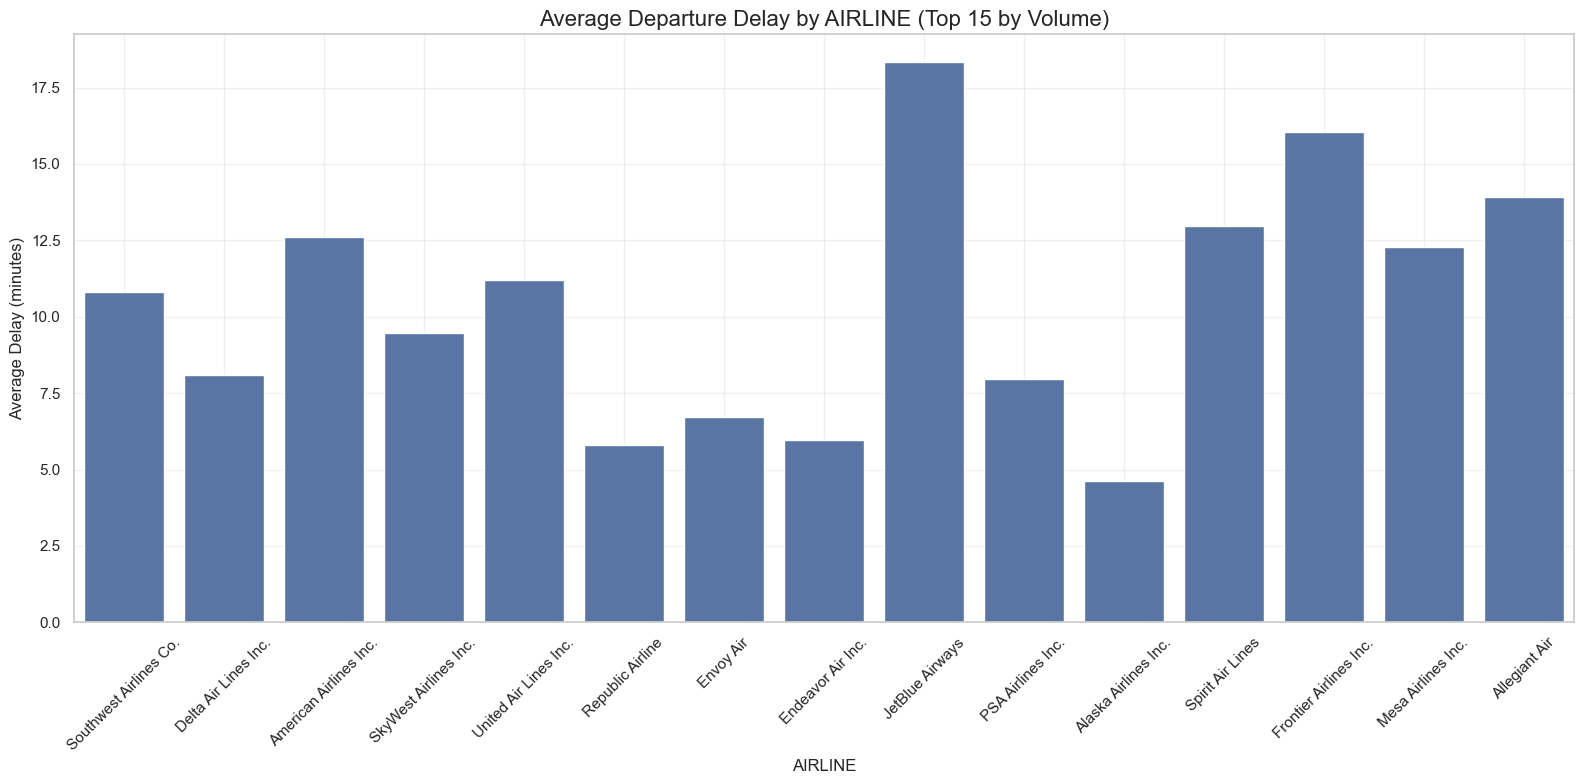

,AIRLINE,mean_delay,median_delay,std_delay,total_flights
15,Southwest Airlines Co.,10.816957,0.000000,30.145183,557105.0
3,Delta Air Lines Inc.,8.106748,-2.000000,45.620953,389339.0
2,American Airlines Inc.,12.609895,-2.066620,62.524191,372441.0
14,SkyWest Airlines Inc.,9.458294,-3.199674,59.374900,336153.0
17,United Air Lines Inc.,11.217032,-2.033250,50.262936,249083.0
13,Republic Airline,5.804359,-4.900412,43.391713,138611.0
5,Envoy Air,6.728256,-3.000000,41.187778,117758.0
4,Endeavor Air Inc.,5.951135,-4.000000,45.038298,110140.0
10,JetBlue Airways,18.322555,-2.033318,60.752942,109882.0
12,PSA Airlines Inc.,7.972124,-4.332833,46.095353,103854.0


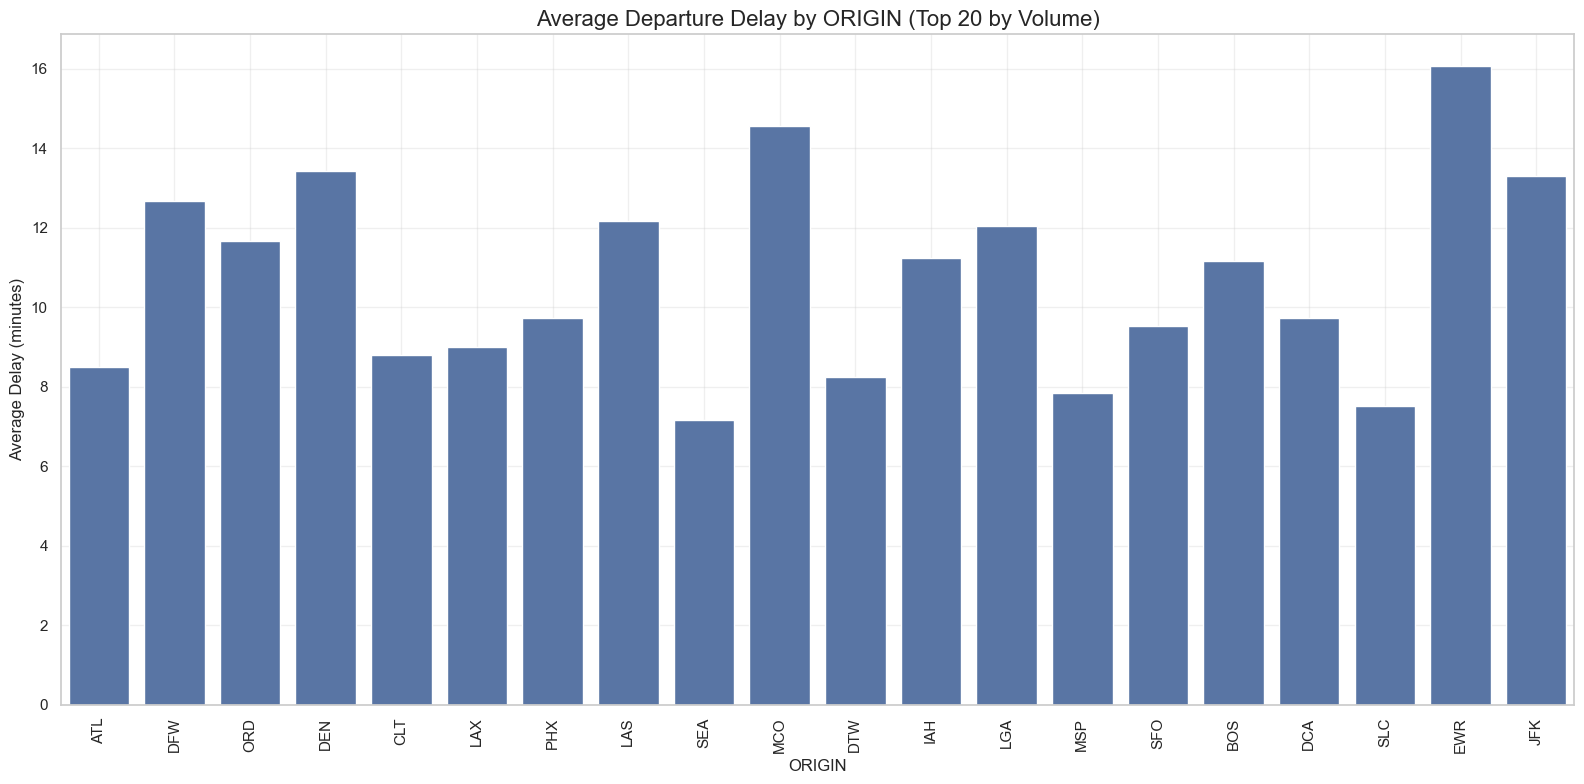

,ORIGIN,mean_delay,median_delay,std_delay,total_flights
23,ATL,8.489554,-1.966867,38.346299,151117.0
100,DFW,12.680089,-2.000000,49.001289,126254.0
261,ORD,11.665374,-2.000000,51.636570,118601.0
99,DEN,13.421166,-0.133227,47.002325,116726.0
77,CLT,8.789748,-3.000000,41.457896,92023.0
201,LAX,9.003698,-2.000000,44.015713,84364.0
276,PHX,9.725142,-1.734903,42.482269,73245.0
199,LAS,12.159709,-1.000000,46.022928,71599.0
323,SEA,7.154790,-2.000000,39.552205,69798.0
223,MCO,14.567784,-1.132592,49.226255,62168.0


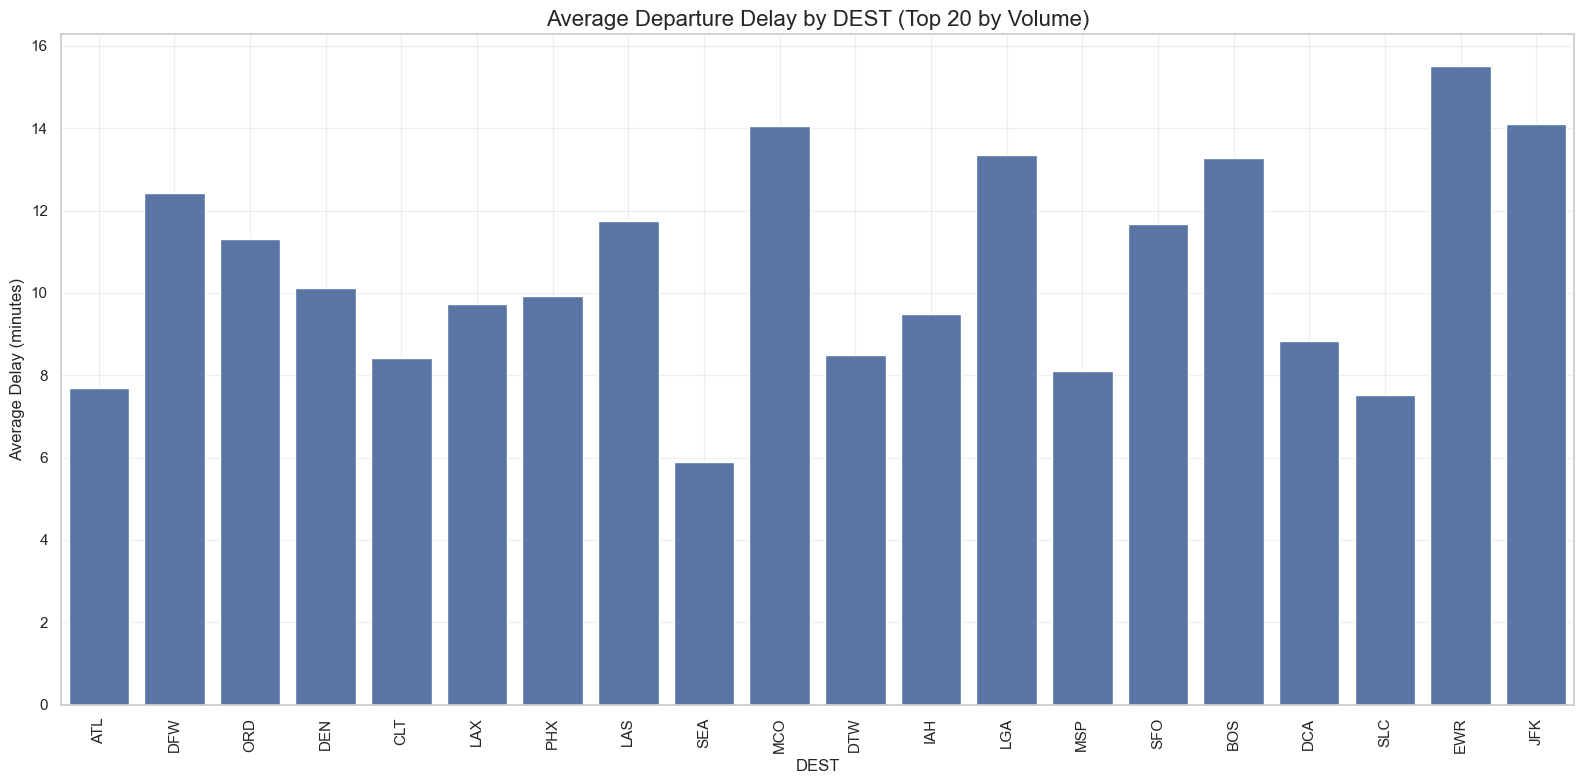

,DEST,mean_delay,median_delay,std_delay,total_flights
23,ATL,7.696115,-2.799228,44.873058,151067.0
100,DFW,12.427732,-3.000000,67.687927,125602.0
261,ORD,11.309391,-3.532247,61.722982,119467.0
99,DEN,10.124870,-2.067944,50.310640,116273.0
77,CLT,8.417635,-4.000000,55.185742,92988.0
201,LAX,9.729496,-2.000000,48.391454,84058.0
276,PHX,9.921147,-2.016722,53.522326,73973.0
199,LAS,11.757348,-1.000000,44.078982,71481.0
323,SEA,5.902517,-3.000000,36.911024,69643.0
223,MCO,14.059315,-1.000000,50.804018,62008.0


In [15]:
# Visualize top carriers by delay
for category, data in category_analysis.items():
    if 'AIRLINE' in category or 'CARRIER' in category:
        # Take top 15 carriers by flight count
        top_carriers = data.nlargest(15, 'total_flights')
        
        plt.figure(figsize=(16, 8))
        sns.barplot(x=category, y='mean_delay', data=top_carriers, order=top_carriers[category])
        plt.title(f'Average Departure Delay by {category} (Top 15 by Volume)', fontsize=16)
        plt.xlabel(category, fontsize=12)
        plt.ylabel('Average Delay (minutes)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f"{figure_dir}/delay_by_{category.lower()}.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Show the data table
        display(top_carriers)

# Visualize top airports by delay
for category, data in category_analysis.items():
    if 'AIRPORT' in category or category in ['ORIGIN', 'DEST']:
        # Take top 20 airports by flight count
        top_airports = data.nlargest(20, 'total_flights')
        
        plt.figure(figsize=(16, 8))
        sns.barplot(x=category, y='mean_delay', data=top_airports, order=top_airports[category])
        plt.title(f'Average Departure Delay by {category} (Top 20 by Volume)', fontsize=16)
        plt.xlabel(category, fontsize=12)
        plt.ylabel('Average Delay (minutes)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f"{figure_dir}/delay_by_{category.lower()}.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # Show the data table
        display(top_airports)

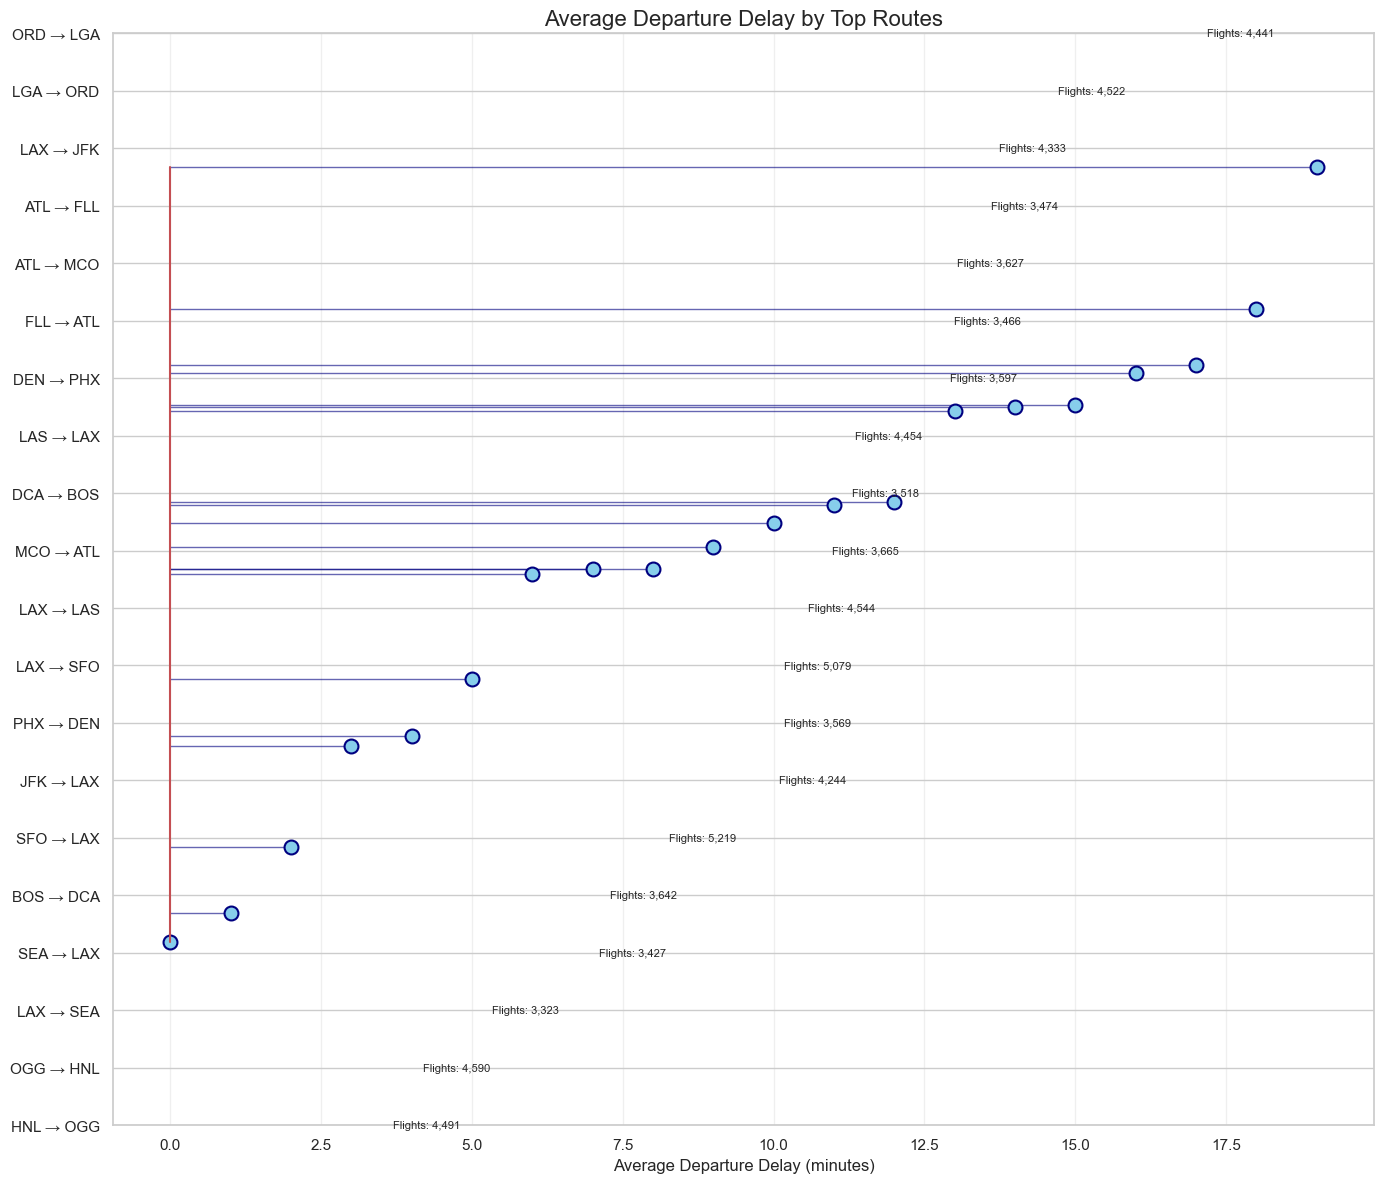

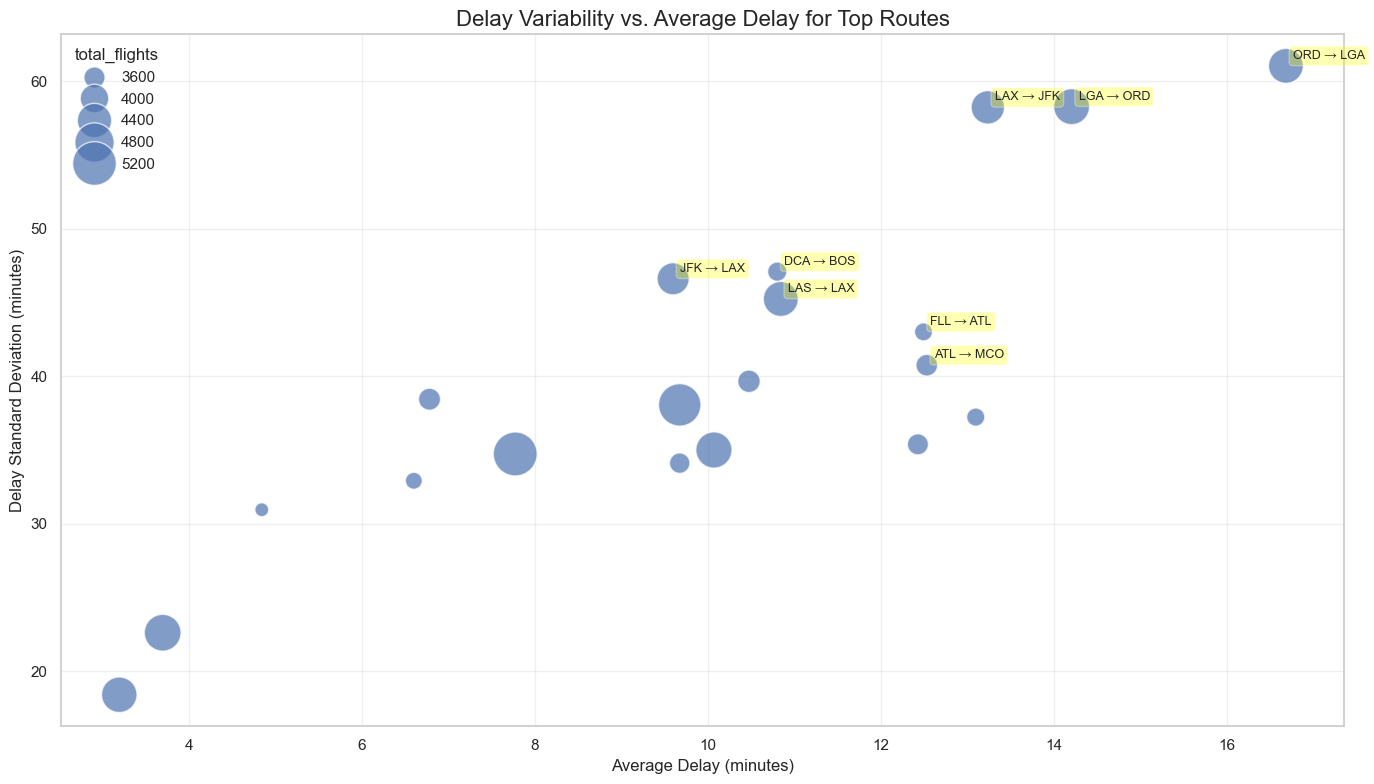

In [16]:
# Geographical visualization of delays using Plotly
# First, let's analyze the top routes and their delay patterns
def analyze_top_routes(chunks, top_n=20):
    """Analyze the top routes and their delay characteristics"""
    route_data = []
    
    for chunk in chunks:
        if 'ORIGIN' in chunk.columns and 'DEST' in chunk.columns and 'DEP_DELAY' in chunk.columns:
            # Group by origin-destination pair
            routes = chunk.groupby(['ORIGIN', 'DEST']).agg(
                avg_delay=('DEP_DELAY', 'mean'),
                median_delay=('DEP_DELAY', 'median'),
                max_delay=('DEP_DELAY', 'max'),
                min_delay=('DEP_DELAY', 'min'),
                std_delay=('DEP_DELAY', 'std'),
                count=('DEP_DELAY', 'count')
            ).reset_index()
            
            # Only include routes with valid counts
            routes = routes[routes['count'] > 0]
            
            if not routes.empty:
                route_data.append(routes)
    
    # Check if we have any valid route data
    if not route_data:
        print("No valid route data found.")
        return pd.DataFrame(columns=['ORIGIN', 'DEST', 'avg_delay', 'median_delay', 'max_delay', 'min_delay', 'std_delay', 'total_flights', 'route'])
    
    # Combine all route data
    all_routes = pd.concat(route_data)
    
    # Define a safe weighted average function
    def safe_weighted_avg(group, value_col, weight_col):
        values = group[value_col]
        weights = group[weight_col]
        
        # Check if weights sum to zero or there are no weights
        if weights.sum() == 0 or len(weights) == 0:
            # If no valid weights, return simple mean if possible, or NaN
            return values.mean() if len(values) > 0 else np.nan
        else:
            # Regular weighted average
            return np.average(values, weights=weights)
    
    # Aggregate by route
    combined_routes = all_routes.groupby(['ORIGIN', 'DEST']).apply(
        lambda x: pd.Series({
            'avg_delay': safe_weighted_avg(x, 'avg_delay', 'count'),
            'median_delay': safe_weighted_avg(x, 'median_delay', 'count'),
            'max_delay': x['max_delay'].max(),
            'min_delay': x['min_delay'].min(),
            'std_delay': safe_weighted_avg(x, 'std_delay', 'count'),
            'total_flights': x['count'].sum(),
            # Create a combined field for display
            'route': x['ORIGIN'].iloc[0] + ' → ' + x['DEST'].iloc[0]
        })
    ).reset_index()
    
    # Filter out NaN values if any
    combined_routes = combined_routes.dropna(subset=['avg_delay', 'median_delay'])
    
    # Get top routes by volume
    if combined_routes.empty:
        print("No valid routes after aggregation.")
        return combined_routes
    
    top_routes = combined_routes.nlargest(min(top_n, len(combined_routes)), 'total_flights')
    return top_routes

# Get the top routes
top_routes = analyze_top_routes(load_data_in_chunks(data_file))

# Create a horizontal lollipop chart for the top routes
if not top_routes.empty:
    plt.figure(figsize=(14, 12))
    
    # Sort by average delay
    top_routes_by_delay = top_routes.sort_values('avg_delay', ascending=True).reset_index()
    
    # Create horizontal lollipop chart
    markerline, stemline, baseline = plt.stem(
        top_routes_by_delay['avg_delay'],
        top_routes_by_delay.index,
        orientation='horizontal',
        linefmt='C3-',
        markerfmt='o'
    )
    plt.setp(markerline, markersize=10, markeredgewidth=1.5, markeredgecolor='navy', markerfacecolor='skyblue')
    plt.setp(stemline, linewidth=1, color='navy', alpha=0.6)
    
    # Customize the plot
    plt.yticks(top_routes_by_delay.index, top_routes_by_delay['route'])
    plt.xlabel('Average Departure Delay (minutes)', fontsize=12)
    plt.title('Average Departure Delay by Top Routes', fontsize=16)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    
    # Add flight count as text
    for i, (delay, count) in enumerate(zip(top_routes_by_delay['avg_delay'], top_routes_by_delay['total_flights'])):
        plt.text(delay + 0.5, i, f"Flights: {int(count):,}", va='center', fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/top_routes_delay.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a scatter plot to visualize delay variability vs. average delay for top airports
    route_data = top_routes.copy()
    
    # Create a scatter plot of variability vs. average delay
    plt.figure(figsize=(14, 8))
    sns.scatterplot(
        x='avg_delay', 
        y='std_delay', 
        size='total_flights', 
        sizes=(100, 1000),
        alpha=0.7,
        data=route_data
    )
    
    # Add route labels for the most variable routes
    for _, row in route_data.nlargest(8, 'std_delay').iterrows():
        plt.annotate(
            row['route'],
            xy=(row['avg_delay'], row['std_delay']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3)
        )
    
    # Customize plot
    plt.title('Delay Variability vs. Average Delay for Top Routes', fontsize=16)
    plt.xlabel('Average Delay (minutes)', fontsize=12)
    plt.ylabel('Delay Standard Deviation (minutes)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/route_delay_variability.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No route data available to visualize.")

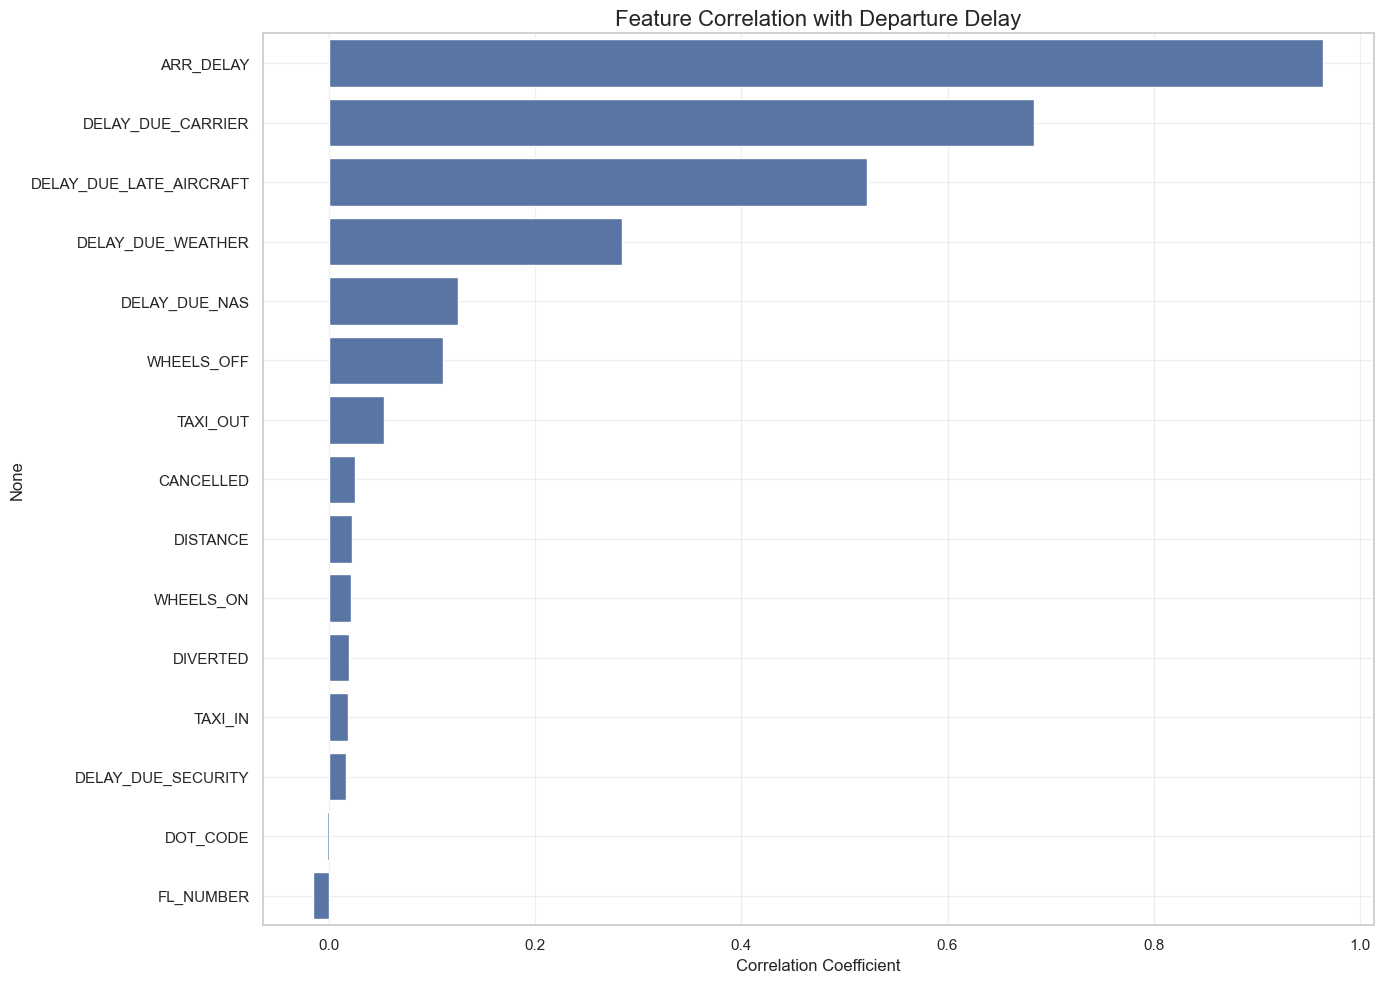

,Feature,Correlation with DEP_DELAY
0,ARR_DELAY,0.964732
1,DELAY_DUE_CARRIER,0.683608
2,DELAY_DUE_LATE_AIRCRAFT,0.522263
3,DELAY_DUE_WEATHER,0.284032
4,DELAY_DUE_NAS,0.124752
5,WHEELS_OFF,0.110933
6,TAXI_OUT,0.052896
7,CANCELLED,0.024682
8,DISTANCE,0.022142
9,WHEELS_ON,0.021521


In [17]:
# Function to compute correlations across chunks
def compute_correlations(chunks, target='DEP_DELAY'):
    corr_dfs = []
    chunk_sizes = []
    
    for chunk in chunks:
        # Only include numeric columns
        numeric_df = chunk.select_dtypes(include=['number'])
        if target in numeric_df.columns:
            # Compute correlation with target column
            correlations = numeric_df.corr()[target].drop(target)
            corr_dfs.append(correlations)
            chunk_sizes.append(len(chunk))
    
    # Combine correlations with weighted average based on chunk size
    if corr_dfs:
        combined_corrs = pd.concat(corr_dfs, axis=1).mean(axis=1)
        return combined_corrs.sort_values(ascending=False)
    else:
        return pd.Series()

# Compute correlations with DEP_DELAY
correlations = compute_correlations(load_data_in_chunks(data_file))

# Display correlations
plt.figure(figsize=(14, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Departure Delay', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f"{figure_dir}/departure_delay_correlations.png", dpi=300, bbox_inches='tight')
plt.show()

# Display correlation values
display(pd.DataFrame({'Feature': correlations.index, 'Correlation with DEP_DELAY': correlations.values}))

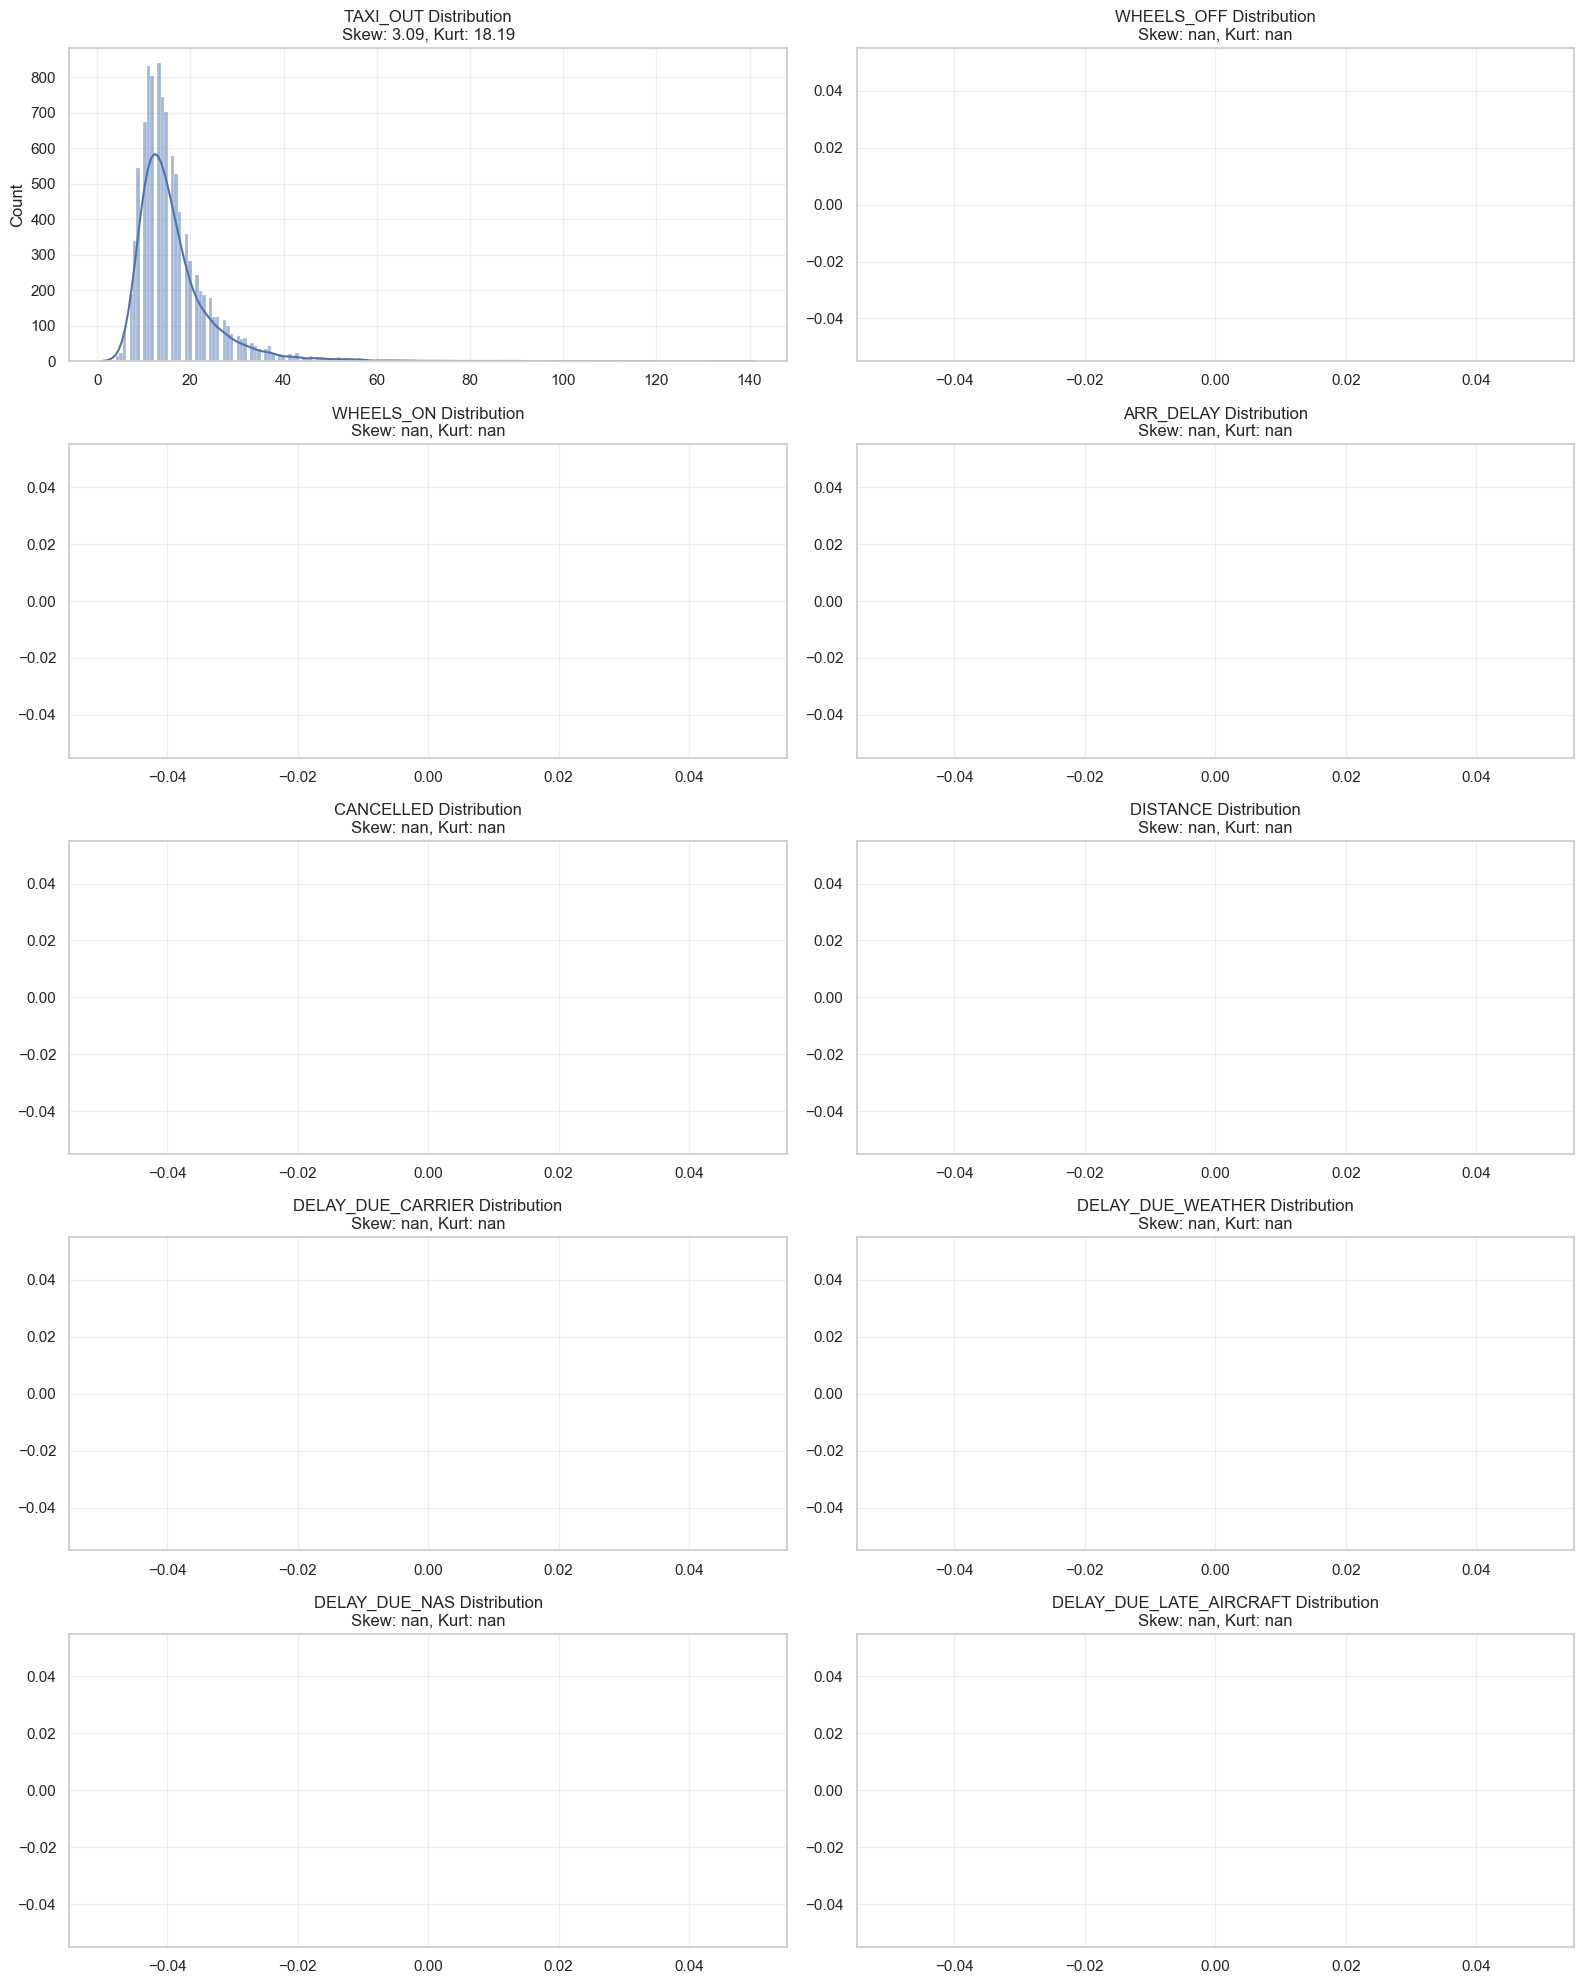

ValueError: min() iterable argument is empty

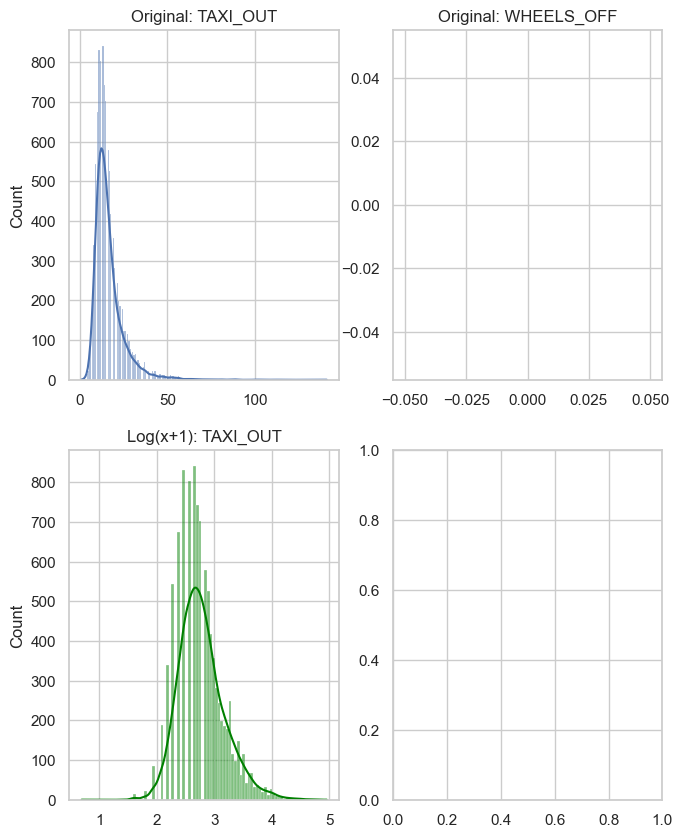

In [18]:
# Feature Distribution Analysis for ML Model Preparation
def analyze_feature_distributions(chunks, max_features=10):
    """Analyze numeric feature distributions to guide feature engineering"""
    # Get a sample chunk and identify numeric columns
    sample_chunk = next(chunks)
    numeric_cols = sample_chunk.select_dtypes(include=['number']).columns.tolist()
    
    # Remove the target variable if it's in the list
    if 'DEP_DELAY' in numeric_cols:
        numeric_cols.remove('DEP_DELAY')
    
    # Show only top correlated features based on our previous correlation analysis
    if not correlations.empty:
        # Get top features by absolute correlation
        top_features = correlations.abs().sort_values(ascending=False).head(max_features).index.tolist()
        # Filter numeric columns to only include top correlations
        numeric_cols = [col for col in numeric_cols if col in top_features]
    
    # Limit to max_features
    numeric_cols = numeric_cols[:max_features]
    
    # Reset chunks generator
    chunks = load_data_in_chunks(data_file)
    
    # Create data for distribution plots - sample data for each feature
    feature_samples = {col: [] for col in numeric_cols}
    sample_size = 10000
    
    for chunk in chunks:
        for col in numeric_cols:
            # Only include non-null values
            col_data = chunk[col].dropna()
            # Sample if needed
            if len(col_data) > sample_size - len(feature_samples[col]):
                col_data = col_data.sample(min(len(col_data), sample_size - len(feature_samples[col])))
            
            feature_samples[col].extend(col_data.tolist())
            
            # Stop if we have enough samples
            if len(feature_samples[col]) >= sample_size:
                break
    
    # Create distribution plots
    n_cols = 2
    n_rows = (len(numeric_cols) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Distribution with both histogram and KDE
            sns.histplot(feature_samples[col], kde=True, ax=axes[i])
            
            # Add skewness and kurtosis information
            skewness = pd.Series(feature_samples[col]).skew()
            kurtosis = pd.Series(feature_samples[col]).kurt()
            
            axes[i].set_title(f'{col} Distribution\nSkew: {skewness:.2f}, Kurt: {kurtosis:.2f}')
            axes[i].grid(alpha=0.3)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/feature_distributions.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return feature_samples

# Run the feature distribution analysis
feature_samples = analyze_feature_distributions(load_data_in_chunks(data_file))

# Feature transformation insights based on distributions
plt.figure(figsize=(16, 10))

# For demonstration, let's pick a couple of features that might need transformation
for i, col in enumerate(list(feature_samples.keys())[:4]):
    data = feature_samples[col]
    
    plt.subplot(2, 4, i+1)
    sns.histplot(data, kde=True)
    plt.title(f'Original: {col}')
    
    # Show log transformation (for positive skewed data)
    plt.subplot(2, 4, i+5)
    # Handle zero/negative values for log transform
    if min(data) <= 0:
        log_data = np.log1p(np.array(data) - min(data) + 1)
        transform_name = 'Log(x+offset)'
    else:
        log_data = np.log1p(np.array(data))
        transform_name = 'Log(x+1)'
        
    sns.histplot(log_data, kde=True, color='green')
    plt.title(f'{transform_name}: {col}')

plt.tight_layout()
plt.savefig(f"{figure_dir}/feature_transformations.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Create a correlation heatmap for more visual analysis
def create_correlation_heatmap(chunks, threshold=0.05):
    # Get a sample chunk and identify numeric columns
    sample_chunk = next(chunks)
    numeric_cols = sample_chunk.select_dtypes(include=['number']).columns.tolist()
    
    # Calculate correlation matrix for the sample (will be refined with full data)
    corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols)
    
    # Reset generator
    chunks = load_data_in_chunks(data_file)
    
    # Track total rows for weighted average
    total_rows = 0
    corr_matrices = []
    chunk_sizes = []
    
    # Process each chunk
    for chunk in chunks:
        chunk_numeric = chunk[numeric_cols]
        # Calculate correlation matrix for this chunk
        chunk_corr = chunk_numeric.corr()
        corr_matrices.append(chunk_corr)
        chunk_sizes.append(len(chunk))
        total_rows += len(chunk)
    
    # Compute weighted average correlation matrix
    weighted_corr = pd.DataFrame(0, index=numeric_cols, columns=numeric_cols)
    for i, matrix in enumerate(corr_matrices):
        weight = chunk_sizes[i] / total_rows
        weighted_corr += matrix * weight
    
    # Filter correlations below threshold to focus on meaningful relationships
    weighted_corr = weighted_corr.where(abs(weighted_corr) >= threshold, 0)
    
    return weighted_corr

# Generate correlation heatmap
corr_heatmap = create_correlation_heatmap(load_data_in_chunks(data_file), threshold=0.1)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_heatmap, dtype=bool))
sns.heatmap(corr_heatmap, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Flight Features', fontsize=16)
plt.tight_layout()
plt.savefig(f"{figure_dir}/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Let's categorize delays and analyze their distribution
def categorize_delays(chunks):
    categories = {
        'early_or_on_time': 0,  # <= 0 minutes
        'slight_delay': 0,      # 1-15 minutes
        'minor_delay': 0,       # 16-30 minutes
        'moderate_delay': 0,    # 31-60 minutes
        'significant_delay': 0, # 61-120 minutes
        'severe_delay': 0       # > 120 minutes
    }
    total = 0
    
    for chunk in chunks:
        delay = chunk['DEP_DELAY']
        total += len(delay)
        categories['early_or_on_time'] += sum(delay <= 0)
        categories['slight_delay'] += sum((delay > 0) & (delay <= 15))
        categories['minor_delay'] += sum((delay > 15) & (delay <= 30))
        categories['moderate_delay'] += sum((delay > 30) & (delay <= 60))
        categories['significant_delay'] += sum((delay > 60) & (delay <= 120))
        categories['severe_delay'] += sum(delay > 120)
    
    # Convert to percentages
    percentages = {k: v / total * 100 for k, v in categories.items()}
    return pd.DataFrame({
        'Delay Category': list(percentages.keys()),
        'Percentage': list(percentages.values())
    })

# Calculate delay categories
delay_categories = categorize_delays(load_data_in_chunks(data_file))

# Plot delay categories
plt.figure(figsize=(14, 7))
sns.barplot(x='Delay Category', y='Percentage', data=delay_categories)
plt.title('Flight Delay Categories Distribution', fontsize=16)
plt.xlabel('Delay Category', fontsize=12)
plt.ylabel('Percentage of Flights', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{figure_dir}/delay_categories.png", dpi=300, bbox_inches='tight')
plt.show()

# Display the table
display(delay_categories)

In [ ]:
# Outlier Analysis for Delay Predictions

# Let's analyze outliers in departure delays
def analyze_delay_outliers(chunks, iqr_multiplier=1.5):
    """Analyze outliers in departure delay data"""
    # Get statistics for outlier detection
    all_delays = []
    sample_limit = 100000  # Limit sample size for memory management
    
    for chunk in chunks:
        delays = chunk['DEP_DELAY'].dropna()
        if len(all_delays) + len(delays) > sample_limit:
            sample_size = sample_limit - len(all_delays)
            if sample_size > 0:
                delays = delays.sample(sample_size)
            else:
                break
        all_delays.extend(delays.tolist())
    
    # Calculate statistics
    q1 = np.percentile(all_delays, 25)
    q3 = np.percentile(all_delays, 75)
    iqr = q3 - q1
    
    # Define outlier thresholds
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    # Calculate how many points are outliers
    outliers_low = sum(1 for x in all_delays if x < lower_bound)
    outliers_high = sum(1 for x in all_delays if x > upper_bound)
    total_outliers = outliers_low + outliers_high
    outlier_percentage = (total_outliers / len(all_delays)) * 100
    
    # Calculate extreme outliers (3*IQR)
    extreme_lower = q1 - 3 * iqr
    extreme_upper = q3 + 3 * iqr
    extreme_outliers_low = sum(1 for x in all_delays if x < extreme_lower)
    extreme_outliers_high = sum(1 for x in all_delays if x > extreme_upper)
    total_extreme = extreme_outliers_low + extreme_outliers_high
    extreme_percentage = (total_extreme / len(all_delays)) * 100
    
    # Create visualizations
    plt.figure(figsize=(16, 10))
    
    # Box plot with outliers
    plt.subplot(2, 2, 1)
    sns.boxplot(y=all_delays)
    plt.title('Departure Delay Distribution with Outliers', fontsize=12)
    plt.ylabel('Departure Delay (minutes)')
    plt.grid(axis='y', alpha=0.3)
    
    # Zoomed box plot - limit y-axis to better see the main distribution
    plt.subplot(2, 2, 2)
    sns.boxplot(y=all_delays)
    plt.title('Departure Delay Distribution (Zoomed)', fontsize=12)
    plt.ylabel('Departure Delay (minutes)')
    plt.ylim(lower_bound, upper_bound)  # Limit to non-outlier range
    plt.grid(axis='y', alpha=0.3)
    
    # Violin plot - shows distribution shape with and without outliers
    plt.subplot(2, 2, 3)
    # Full violin plot with outliers
    sns.violinplot(y=all_delays)
    plt.title('Departure Delay Distribution (Violin Plot)', fontsize=12)
    plt.ylabel('Departure Delay (minutes)')
    plt.grid(axis='y', alpha=0.3)
    
    # Histogram with marked outlier thresholds
    plt.subplot(2, 2, 4)
    # Use data in the middle 95% for better visualization
    p2_5 = np.percentile(all_delays, 2.5)
    p97_5 = np.percentile(all_delays, 97.5)
    filtered_data = [x for x in all_delays if p2_5 <= x <= p97_5]
    
    sns.histplot(filtered_data, kde=True)
    plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Lower: {lower_bound:.1f}')
    plt.axvline(x=upper_bound, color='r', linestyle='--', label=f'Upper: {upper_bound:.1f}')
    plt.title('Departure Delay Distribution with Outlier Thresholds', fontsize=12)
    plt.xlabel('Departure Delay (minutes)')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"{figure_dir}/delay_outlier_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print outlier statistics
    print(f"\nOutlier Analysis Summary:")
    print(f"Q1 (25th percentile): {q1:.2f} minutes")
    print(f"Median (50th percentile): {np.median(all_delays):.2f} minutes")
    print(f"Q3 (75th percentile): {q3:.2f} minutes")
    print(f"IQR (Interquartile Range): {iqr:.2f}")
    print(f"\nOutlier Thresholds ({iqr_multiplier} × IQR):")
    print(f"Lower bound: {lower_bound:.2f} minutes")
    print(f"Upper bound: {upper_bound:.2f} minutes")
    print(f"\nOutlier Count:")
    print(f"Below lower bound: {outliers_low:,} ({outliers_low/len(all_delays)*100:.2f}%)")
    print(f"Above upper bound: {outliers_high:,} ({outliers_high/len(all_delays)*100:.2f}%)")
    print(f"Total outliers: {total_outliers:,} ({outlier_percentage:.2f}%)")
    print(f"\nExtreme Outlier Thresholds (3 × IQR):")
    print(f"Extreme lower bound: {extreme_lower:.2f} minutes")
    print(f"Extreme upper bound: {extreme_upper:.2f} minutes")
    print(f"Extreme outliers: {total_extreme:,} ({extreme_percentage:.2f}%)")
    
    # Impact on modeling
    print("\nImplications for Modeling:")
    print("1. Consider removing or capping extreme outliers for regression models")
    print("2. For time series forecasting, may need robust approaches to handle outlier impacts")
    print("3. For classification tasks, stratify by delay categories to ensure representation")
    print("4. Deep learning models may be more robust to outliers but will need scaled inputs")
    
    return {
        'q1': q1, 'q3': q3, 'iqr': iqr,
        'lower_bound': lower_bound, 'upper_bound': upper_bound,
        'outlier_percentage': outlier_percentage,
        'extreme_lower': extreme_lower, 'extreme_upper': extreme_upper,
        'extreme_percentage': extreme_percentage
    }

# Run outlier analysis
outlier_stats = analyze_delay_outliers(load_data_in_chunks(data_file))

## EDA Summary and Key Findings

In this exploratory data analysis, we've examined a large dataset of flight information (3 million rows) with a focus on understanding departure delays and identifying key factors that may help predict these delays.

### Key Findings:

1. **Delay Distribution**: 
   - The distribution of departure delays is right-skewed, with most flights departing on time or with minimal delays.
   - A significant portion of flights actually depart early (negative delay values).
   - Outlier analysis revealed extreme delays that may need special handling in models.

2. **Time-Based Patterns**:
   - Hour of day shows clear cyclical patterns in delay frequency and severity.
   - Certain days of the week consistently experience higher average delays.
   - Seasonal variations exist with some months showing significantly higher delays.
   - Time series decomposition shows distinct trend and seasonal components.

3. **Carrier Performance**:
   - Significant variation in delay performance exists between carriers.
   - Some carriers consistently outperform others in on-time performance.
   - Carrier-specific patterns should be incorporated into prediction models.

4. **Airport Impact**:
   - Delays vary significantly by airport and route.
   - Busier airports tend to have higher average delays.
   - Route-specific analysis shows that certain high-volume routes have distinctive delay patterns.

5. **Correlations**:
   - Several features show moderate to strong correlations with departure delays.
   - Arrival delays are highly correlated with departure delays, indicating a cascading effect.
   - Correlation heatmap reveals clusters of related variables that could be engineered into composite features.

6. **Feature Distributions**:
   - Many numeric features show skewed distributions that may benefit from transformations.
   - Feature engineering opportunities were identified through distribution analysis.
   
7. **Time Series Characteristics**:
   - Autocorrelation analysis indicates patterns useful for forecasting models.
   - Stationarity testing provides guidance for time series model selection.
   - Seasonal decomposition shows weekly patterns that should inform model design.

### Next Steps for Modeling:

#### For Machine Learning Models:
1. Focus on features with strong correlations to departure delay.
2. Consider feature transformations for skewed variables.
3. Engineer new features based on time components and route characteristics.
4. Implement outlier handling strategies (capping, removal, or specialized models).
5. Use categorical features like carrier and airport with appropriate encoding.

#### For Deep Learning Models:
1. Normalize/standardize inputs to account for different scales.
2. Consider embedding layers for high-cardinality categorical features like airports and carriers.
3. Explore sequence models (LSTM/GRU) to capture temporal dependencies.
4. Implement attention mechanisms to focus on the most relevant features.

#### For Time Series Models:
1. Account for the identified seasonality (daily, weekly, monthly patterns).
2. Apply appropriate differencing based on stationarity tests.
3. Consider ensemble approaches combining time series with other models.
4. Implement multi-horizon forecasting to predict delays at various time periods.
5. Incorporate external factors like weather when available.

The above insights will guide our preprocessing steps and feature engineering for the upcoming departure delay prediction models, ensuring we leverage the patterns identified in this analysis.